# <span style="color:Tomato"> **Prueba 2**: Analizando los crímenes en la ciudad de Nueva York. </span>

## 1- Hito 1

### 1.1 - Preliminares

#### 1.1.1 - Entendimiento del problema

##### 1.1.1.a - Problematica

Se analizará la base de datos 'stop_andfrisk_data' sobre interrogaciones y detenciones realizadas por la policia de Nueva York en la via pública

* Policía predictiva se refiere al uso de técnicas matemático-predictivas y analíticas en la aplicación de la ley para identificar la potencial actividad criminal. Los métodos de policía predictiva pueden ser cuatro categorías:
    - Pronosticar delitos
    - Pronosticar infractores
    - Pronosticar las identidades de los delincuentes
    - Pronosticar víctimas de delitos
* La policía predictiva usa datos acerca del tiempo, ubicaciones y naturaleza de delitos pasados, para proporcionar una visión clara a los estrategas policiales que se preocupan de dónde y cuándo tienen que patrullar o mantener presencia las patrullas policiales, para hacer un uso mejor de recursos o para tener una probabilidad más alta de desbaratar los delitos, evitando así algunos.
* Mencionar que no es una estrategia magia capaz de evitar los crimenes, mas bien una herramienta para preparar una estrategia de prevencion de delitos.
* Una crítica a este modelo es la posible discriminacion a ciertos grupos dentro de la sociedad que estos modelos pueden conllevar de la mano.  Sobre todo si el modelo es entrenado con datos sesgados


Tema a tratar:
* A: Probabilidad de arresto: Reportar la probabilidad de que un individuo sea arrestado en uno de los cinco barrios, condicional al género y a la raza. ¿Que implicancias éticas tienen las conclusiones?
* B: Modelo predictivo de arrestos: Generar un modelo predictivo que indique si un procedimiento concluirá en arresto o no.
* C: Modelo predictivo de violencia: Generar un modelo predictivo que determine si el procedimieto concluirá en una accion violenta o no.

##### 1.1.1.b - Atributos

A continuacion se importa la lista de atributos del archivo '2009 SQF File Spec.xlsx'

In [1]:
import pandas as pd
atributos = pd.read_excel('2009 SQF File Spec.xlsx')

In [2]:
atributos

,NYPD Stop Question Frisk Database 2009,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,File specifications,NaN,NaN,NaN
1,.,NaN,NaN,NaN
2,Variable,Position,Label,Measurement Level
3,year,1,YEAR OF STOP (CCYY),Nominal
4,pct,2,PRECINCT OF STOP (FROM 1 TO 123),Nominal
...,...,...,...,...
109,xcoord,107,LOCATION OF STOP X COORD,Nominal
110,ycoord,108,LOCATION OF STOP Y COORD,Nominal
111,dettypCM,109,DETAILS TYPES CODE,Nominal
112,lineCM,110,COUNT >1 ADDITIONAL DETAILS,Nominal


In [3]:
atributos.columns = list(atributos.iloc[2])
atributos = atributos.drop(index=[0,1,2])

In [4]:
pd.options.display.max_rows = None

In [5]:
atributos

,Variable,Position,Label,Measurement Level
3,year,1,YEAR OF STOP (CCYY),Nominal
4,pct,2,PRECINCT OF STOP (FROM 1 TO 123),Nominal
5,ser_num,3,UF250 SERIAL NUMBER,Nominal
6,datestop,4,DATE OF STOP (MM-DD-YYYY),Nominal
7,timestop,5,TIME OF STOP (HH:MM),Scale
8,recstat,6,RECORD STATUS,Nominal
9,inout,7,WAS STOP INSIDE OR OUTSIDE ?,Nominal
10,trhsloc,8,WAS LOCATION HOUSING OR TRANSIT AUTHORITY ?,Nominal
11,perobs,9,PERIOD OF OBSERVATION (MMM),Nominal
12,crimsusp,10,CRIME SUSPECTED,Scale


In [6]:
pd.options.display.max_rows = 60
pd.options.display.max_columns = 20

* A Probabilidad de arresto:
   - city: Barrio donde se realiza la detención.
   - sex: Genero del detenido.
   - race: Raza del detenido.
* B: Modelo predictivo de arrestos
   - arstmade: vector objetivo, variable binaria (Y, N), el arresto se realizo?
* C: Modelo predictivo de violencia:
   - pf_*: codigo presente en los arrestos con violencia fisica.
   

##### 1.1.1.c - Vector Objetivo

* Se debe trabajar con dos vectores objetivos:
    - Para el ejercicio B el vector objetivo es si la detencion implico arresto, el cua esta asociado a **arstmade**.
    - Para el ejercicio C se debe generar un vector objetivo a partir de los atributos asociadoa a detenciones con violencia, los cuales tienen prefijos pf_*. Donde si cualquiera de estas variables es afirmativa se considerara como detencion violenta.

##### 1.1.1.d - Tipo de problema

* Dada las caracteristicas binarias, en ocurrencia o no ocurrencia del suceso, sabemos que nuestro problema sera un problema de **clasificacion**.
* Ejericio A.- Modelo predictivo de arrestos: V. Obj. **arstmade**: Y, N se realiza el arresto o no.
* Ejericio B.- Modelo predictivo de violencia: V. Obj. se llamara **violmade**: Y, N Almenos un tipo de violencia o no.

#### 1.1.2 - Aspectos Computacionales

##### 1.1.2.a - Librerías

* Python 3.9.16
* conda 23.3.1
* pandas 1.5.3
* numpy 1.24.3
* seaborn 0.12.2
* matplotlib 3.7.1
* matplotlib-inline 0.1.6
* imbalanced-lear 0.10.1
* regex 2022.7.9
* nltx 3.7
* scikit-learn-intelex (daal4py) 2023.0.2

In [7]:
#Ignorar alertas de deprecacion
import warnings
warnings.filterwarnings("ignore")
#Manejo de base de datos y funciones estadisticas
import pandas as pd
import numpy as np
import seaborn as sns
#Generar graficas y estilos de graficos.
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

#Preprocesamiento
from sklearn.impute import SimpleImputer #imputar datos perdidos

#Dividir matriz de datos
from sklearn.model_selection import train_test_split #para imputar 

#Grillas de crossvalidation
from sklearn.model_selection import GridSearchCV

#Modelos
from imblearn.over_sampling import SVMSMOTE # Balancear datos
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

#Metricas
from sklearn.metrics import classification_report

#Seralizacion
from pickle import dump

##### 1.1.2.b - Funciones propias

In [8]:
from funciones_p2 import separar_columnas #info columnas proactiva 
from funciones_p2 import estudio_nulos #resumen de vacios con simbolos
from funciones_p2 import contar_nan #conteo de np.nan
from funciones_p2 import entrenar_imputador #imputar datos
from funciones_p2 import graficar_porcentajes_cat #graficar porcentajes
from funciones_p2 import graficar_cont #Graficos continuos
from funciones_p2 import pipe_df_test #Graficos continuos
from funciones_p2 import df1_vs_df2 #compara columnas en dfs
from funciones_p2 import graficar_importancia #Grafico de atributos
from funciones_p2 import modelacion_inicial #modelacion
from funciones_p2 import plot_classification_report as pcr #resumen indicadores


#### 1.1.3 - Modelos y grillas a implementar

En los ejercicios con gran magnitud de columnas se debe separar agrupar y analizar con mucho detalle la informacion. Algunos de los pasos a seguir seran:

1. Obtener un sub dataframe con los atributos principales.
    - Se creara un df inicial con todos los atributos requeridos, luego se obtendran las sub matrices X e Y para cada caso.
2. Con el DF principal se estudiara el comportamiento de las variables, correlaciones, normalidad, densidades de poblacion, busqueda de algun sesgo en la data.
3. Generar 3 modelos para el ejercicio A y 5 para el ejercicio B que logren predecir si sera un arresto o si sera violento respectivamente. Modelos tentativos
    - Linear Discriminant Analysis: Fundamental en caso que los datos presenten correlaciones elevadas.
    - Super vector machine: Si son datos muy dificiles de diferenciar entre si, para obtener espacios vectoriales superiores.
    - Random Forest Classification: Modelo potente para la extraccion de factores y reporte de atributos.
    - GradientBoostingClassifier: Al igual que random forest es muy potente y evita caer en sesgo excesivo.
    - Voting Classifier: Finalmente agregar un sistema de votacion para obtener lo mejor de todos los modelos previos.


#### 1.1.4 - Modelos y Grillas

##### 1.1.4.a - Linear Discriminant Analysis

* Linear Discriminant Analysis LDA: Modelo utilizado para la disminucion de dimensiones y clasificacion de datos. Busca combinaciones lineales para encontrar la mejor forma de separar las categorias. Dicho esto se utilizara una clasificacion binaria modificando los hiperparametros disponibles.
* Parametros para la grilla:
    - solver = 'svd' , lsqr
    - shrinkage = 'none' : reduce la varianza de las estimaciones de las covarianzas de las clases.
    - priors = valor se infiere desde la data
    - n_components = none implica el minimo: numero de componentes a extraer.

##### 1.1.4.b - Super Vector Machine (SVM: SVC en sklearn)

* Super Vector Machine (SVM: SVC en sklearn): Algoritmo de aprendizaje supervisado. Construye un hiperplano en un espacio de alta dimension y busca maximizar la distancia entre los puntos del hiperplano. Permite encontrar el hiperplano optimo incluso cuando los datos no son linealmente separables.
    - Capacidad de manejar conjuntos de datos de alta dimensionalidad y complejos.
    - Alto consumo computacional.
    - Variantes de menor consumo computacional LinearSVC y SGDClassifier.
* Parametros para la grilla
    - C : [float] default=1.0 = parametro de regularizacion
    - kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’
    - degree: int, default=3 : grado del polinomio del kernel 
    - gamma: {‘scale’, ‘auto’} or float, default=’scale’: Coeficiente del kernel
    - random_state


##### 1.1.4.c - Random Forest Classification

* Es un algoritmo de aprendizaje supervisado. En vez de construir solo un arbol de decision como en decision tree clasifier, genera muchos y promedia los resultados.
    - Selecciona aleatoriamente submuestras de X e Y para evitar sobre ajuste y mejorar la capacidad de generalización.
    - Genera una medida de importancia en cada caracteristica.
* Parametros:
    - n_estimators: default=100
    - criterion: “gini”, “entropy”, “log_loss”, default=”gini”
    - max_depth: profundidad default: none = nodos expandidos hasta que las hojas contengan min_samples_split samples o puras
    - min_samples_split: default=2 : minimo numero de samples para separar un nodo, un valor mayor puede reducir el riesgo de sobreajuste
    - min_samples_leaf: default=1 : este parámetro controla el número mínimo de muestras que se requieren en cada hoja del árbol. Un valor mayor puede hacer que el modelo sea más generalizado
    - max_features{“sqrt”, “log2”, None}, int or float, default=”sqrt”
    - warm_start: default=False: True = Reutiliza la solucion previa para entrenar y agregar mas estimadores.
    - random_state

##### 1.1.4.d - AdaBoost o Adaptive Boosting y Gradient Boost

* Ada boost: Algoritmo de aprendizaje automatico supervisado, utilizado para mejorar la precision de modelos de aprendizaje debil. Corrije dandole peso a los puntos donde el modelo anterior clasificó de manera incorrecta.
    - comunmente utiliza como modelos debiles arboles de decision, regresion logistica o SVM
    - Util para modelos de clasificacion binaria, multiclase, imagenes, deteccion de spam.
* Parametros
    - Estimator: default: DecisionTreeClassifier
    - n_estimators: default: 50 = Numero de clasificadors debiles utilizados en el modelo, a medida que aumenta el modelo se vuelve mas preciso, pero tambien aumenta el tiempo de entrenamiento.
    - Learning rate: default:1.0 = controla la contribución de cada estimador en el conjunto final. Un learning rate alto significa que se da más importancia a la contribución de cada estimador individual, lo que puede llevar a un sobreajuste. Un learning rate bajo significa que cada estimador individual contribuye poco al modelo final, lo que puede llevar a un bajo rendimiento.
    - randomstate

* Gradient boosting: Es similar en su funcionamiento a adaboost. A diferencia de Adaboost, GBC construye árboles secuencialmente y cada nuevo árbol se entrena para corregir los errores del modelo anterior. De esta manera, cada árbol se enfoca en corregir los errores de los árboles anteriores
* Parametros:
    - loss: ‘log_loss’, ‘deviance’, ‘exponential’, default=’log_loss’= Funcion de perdida a ser optimizada en exponencial  gradient boost toma el algoritmo de adaboost
    - n_estimator: default 100 = un numero alto siele resultar en una mejor performance.
    - subsample: default=1 = fraccion de muestras para ser entrenadas como base del aprendizaje. seleccionar un valor menor a 1 implica reduccion de la varianza debe estar entre 0 y 1
    - min_samples_split: default 2 = min de muestras requeridas para dividir un nodo. Un valor más alto evita divisiones que conducen a regiones con pocas muestras, lo que puede reducir el sobreajuste, pero también puede hacer que el modelo pierda información importante.
    - min_samples_leaf: default 1 = min de muestras requeridas para estar en un nodo de hoja.
    - max_depthi: int - None, default:3 =  La profundidad máxima de cada árbol. Un valor más alto permite que el modelo capture relaciones más complejas, pero también aumenta la posibilidad de sobreajuste.
    - max_features{‘auto’, ‘sqrt’, ‘log2’}, int or float, default=None
    - warm_star: tbool, default: False = Guarda el resultado anterior en la memoria para iterar.
    - randomstate
    

##### 1.1.4.e - Voting Classifier

* Algoritmo de ensamble que combina multiples modelos de aprendizaje automatico para producir su prediccion.
* parametros:
    - Estimators: una lista de estimadores a utilizar. Cada estimador debe ser un objeto de clasificación o regresión que tenga los métodos fit y predict.
    - Voting: default: hard = Tipo de votación a utilizar. Puede ser 'hard' (predicciones discretas) o 'soft' (predicciones de probabilidad).
    - weights: una lista de pesos que se aplican a cada estimador. Los pesos pueden utilizarse para ajustar la importancia de cada estimador en la votación final.
    - flatten_transform: un parámetro booleano que indica si se deben aplanar los resultados de la transformación predictiva. Si se establece en True, los resultados se aplanan en una matriz unidimensional.


### 1.2 Análisis Exploratorio

#### 1.2.1 Estudio del vector objetivo

##### 1.2.1.a - Importar dataframe

In [9]:
df_train = pd.read_csv('2009_1perc.csv').drop(columns='Unnamed: 0')
df_train

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,,41,G,7,,1013067,0238633,CM,1,20
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,,108,J,,,1012043,0212157,CM,1,14
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,,43,E,,,1017599,0240200,CM,1,20
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,,77,J,4,35,1002625,0183442,CM,1,24
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,,110,H,,,1024535,0209890,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5807,2009,52,3719,3282009,210,A,O,P,1.0,ASSAULT,...,,52,A,,,1009910,0255837,CM,1,9
5808,2009,79,15751,9292009,2008,A,O,P,3.0,CPW,...,,79,F,17,,1001545,0192836,CM,1,20
5809,2009,69,3024,6262009,1937,1,O,P,1.0,FEL,...,,69,B,,,1012860,0174682,CM,1,85
5810,2009,76,1303,3102009,59,1,O,H,1.0,CPM MISD PSA#771,...,,76,A,10,,0981820,0185424,CM,1,27


In [10]:
df_test = pd.read_csv('2010_1perc.csv').drop(columns='Unnamed: 0')
df_test

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2010,6,487,1192010,1420,1,O,P,2,FEL,...,,6,G,,38,983543,208767,CM,1,85
1,2010,42,7138,9042010,225,1,I,T,10,FELONY,...,,42,E,,,1014172,241737,CM,1,45
2,2010,33,2628,6302010,1240,1,I,T,5,ROBBERY,...,,33,B,6,,1000916,245710,CM,1,85
3,2010,108,6384,11172010,2338,1,O,P,3,CSCS,...,,108,J,,,1012612,212240,CM,1,28
4,2010,14,2295,3072010,2240,1,I,T,5,MISD/ CPW,...,,14,C,7,,987636,212439,CM,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6008,2010,60,7062,9262010,45,1,O,H,2,MISD,...,,60,I,,,989382,155162,CM,1,20
6009,2010,75,15797,7302010,10,A,O,P,1,ROBBERY,...,,75,A,,,1012757,186018,CM,1,85
6010,2010,123,830,4302010,1630,A,O,P,3,GLA,...,,123,E,,,933868,138600,CM,1,46
6011,2010,115,13122,11232010,2100,1,O,P,1,FELONY,...,,115,E,,,1014722,214388,CM,1,85


##### 1.2.1.b - Vector objetivo **arstmade** sin recodificar

In [11]:
df_train['arstmade'].isnull().value_counts()

False    5812
Name: arstmade, dtype: int64

In [12]:
df_train['arstmade'].value_counts()

N    5464
Y     348
Name: arstmade, dtype: int64

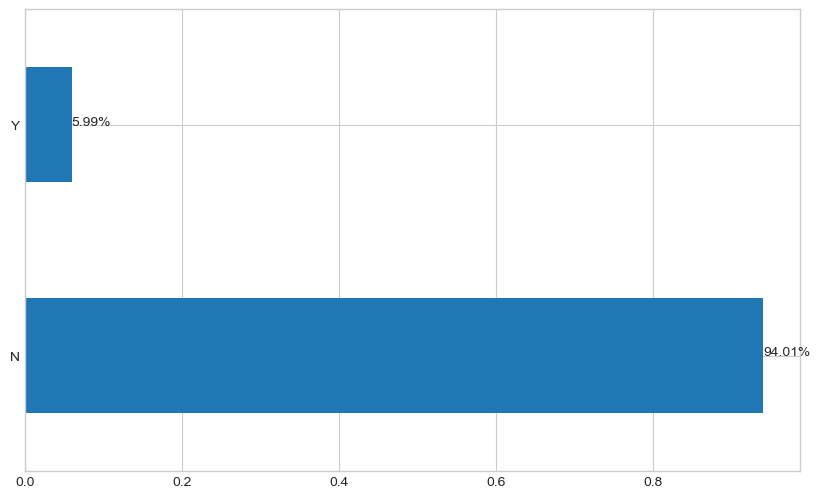

In [13]:
graficar_porcentajes_cat(df_train['arstmade'])

* Se observa una gran cantidad de eventos que no terminan en arresto solo un 5.99% de los datos, lo cual equivale a solo 348 eventos que si terminan en arresto.
* Se realizara un analisis de atributos para extraer los que influyan mas en el vector objectivo.

##### 1.2.1.c - Vector objetivo **violmade**

In [14]:
df_train.filter(regex='^pf_')

,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other
0,N,N,N,N,N,N,N,N,N
1,N,N,N,N,N,N,N,N,N
2,N,N,N,N,N,N,N,N,N
3,N,N,N,N,N,N,N,N,N
4,N,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...
5807,N,N,N,N,N,N,N,N,N
5808,Y,N,N,N,N,N,N,N,N
5809,N,N,N,N,N,N,N,N,N
5810,N,N,N,N,N,N,Y,N,N


In [15]:
df_train['violmade'] = df_train.filter(regex='^pf_').apply(lambda row: row.str.contains('Y').any(), axis=1).astype(str)

In [16]:
df_train['violmade'].value_counts()

False    4359
True     1453
Name: violmade, dtype: int64

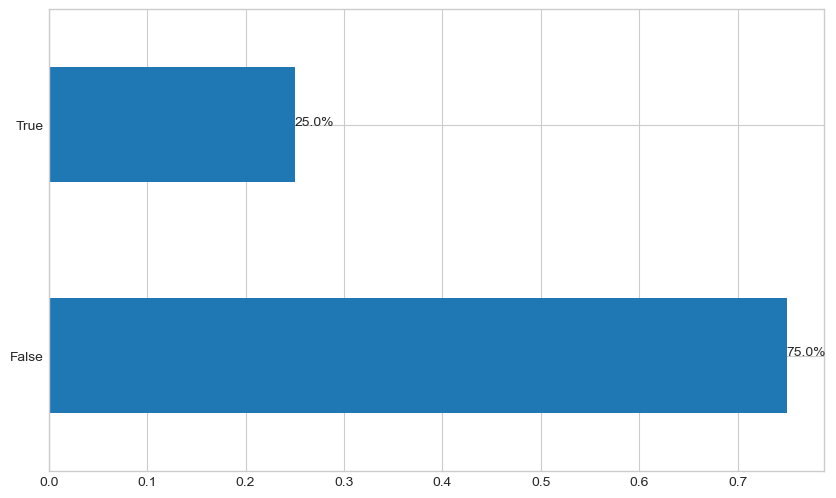

In [17]:
graficar_porcentajes_cat(df_train['violmade'])

* Se observa que al menos un 25% de las detenciones se realizaron con algun tipo de violencia, mientras que un 75% no existio violencia de ni un tipo.

#### 1.2.2 Estudio de datos nulos

##### 1.2.2.a - Vista General

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5812 entries, 0 to 5811
Columns: 112 entries, year to violmade
dtypes: float64(1), int64(18), object(93)
memory usage: 5.0+ MB


In [19]:
_ , _ = estudio_nulos(df_train, ' ')

trhsloc: 205
arstoffn: 5464
sumoffen: 5456
officrid: 5727
offverb: 4559
offshld: 4205
othfeatr: 5812
rescode: 5812
premtype: 5812
premname: 591
addrnum: 3300
stname: 3225
stinter: 40
crossst: 40
aptnum: 5812
state: 5812
zip: 5812
sector: 116
beat: 3622
post: 5268
xcoord: 168
ycoord: 168


* Se observan muchas columnas con celdas vacias en casi todas las entradas. 
* Sin embargo antes de decidir eliminarlas, se debe estudiar el motivo de por que se comportan de esa manera, ya que vacio no necesariamente nos indica un dato perdido.

In [20]:
_ , _ = estudio_nulos(df_train, 999)

ser_num: 1
age: 3
weight: 4
addrnum: 1
stinter: 1
crossst: 1
xcoord: 1
ycoord: 1


* Son menos datos, quiza esten asociados a datos perdidos, u outliers
* Se debe estudiar la columna para tomar medidas.

In [21]:
_ , _ = estudio_nulos(df_train, 99)

ser_num: 1
crimsusp: 2
perstop: 1
arstoffn: 1
sumoffen: 1
age: 12
premname: 2
addrnum: 4
stname: 5
stinter: 10
crossst: 10
xcoord: 4
ycoord: 3


Al igual que el punto anterior se deben estudiar las columnas para elegir el camino a tomar.

**En conclusión:** Antes de tomar cualquier medida sobre los datos perdidos o no, se realizara un analisis de cada columna para encontrarle el sentido a los valores.

##### 1.2.2.b - Dropear columnas no relevantes.

Dado el tipo de datos que se tienen, se procedera a trabajar la mayoria de los datos como object, tomando medidas que faciliten la discriminacion de categorias, y así no afectaran los campos que no contengan informacion, ya que de eliminar todos los valores ausentes se eliminarian demasiadas filas del dataframe.

* Se transforman a object columnas categoricas y dropean las columnas no relevantes.
* En cuanto a direcciones se mantendran los barrios (city) y las coordenadas.

Se parte por discriminar segun el archivo '2009 SQF File Spec' las columnas que son relevantes y las que no.

**NOTA**: por motivos de orden y continuidad del ejercicio se agrupan los drop iniciales en la siguiente celda, siendo que algunos analisis se realizaron observando el grafico de esta misma seccion.

* Eliminar toda columna irrelevante segun descripción

In [22]:
df_train = df_train.drop(columns='year') # No es relevante, un solo valor 2009
df_train = df_train.drop(columns='pct') # Recinto no es relevante,se discrimina por barrio
df_train = df_train.drop(columns='ser_num') # numero de serie
df_train = df_train.drop(columns='datestop')  # fecha no es relevante,se discrimina por detenido
df_train = df_train.drop(columns='compyear') # fecha no es relevante,se discrimina por detenido
df_train = df_train.drop(columns=['repcmd', 'revcmd']) # reportes no importantes
df_train = df_train.drop(columns='comppct') # recinto no es relevante,se discrimina por barrio
df_train = df_train.drop(columns='dob') # cumpleaños no significativa 

# direcciones no es relevante,se discrimina por barrio
df_train = df_train.drop(columns=['addrpct','premname','stinter','crossst',
                                  'addrnum','stname' ,'stname','detailcm',
                                  'beat','post' ]) 

* Eliminar todas las columnas que tienen solo una categoría, ya que no aportan nada al análisis

In [23]:
for col , _  in df_train.items():
    if len(df_train[col].unique()) == 1:
        df_train = df_train.drop(columns=col)

* Separar object de numeros

##### 1.2.2.c - Vista previa de atributos.

In [24]:
lista_objects, lista_numeros = separar_columnas(df_train, min_filas=2,max_col=5)

Columnas en Obj: 76, en numero: 7, otro: 0

Grillas posibles obj:
Filas = 2, Columnas = 38.0
Filas = 3, Columnas = 26.0
Filas = 4, Columnas = 19.0
Filas = 5, Columnas = 16.0
Filas = 6, Columnas = 13.0

Grillas posibles numericas:
Filas = 2, Columnas = 4.0
Filas = 3, Columnas = 3.0
Filas = 4, Columnas = 2.0
Filas = 5, Columnas = 2.0
Filas = 6, Columnas = 2.0


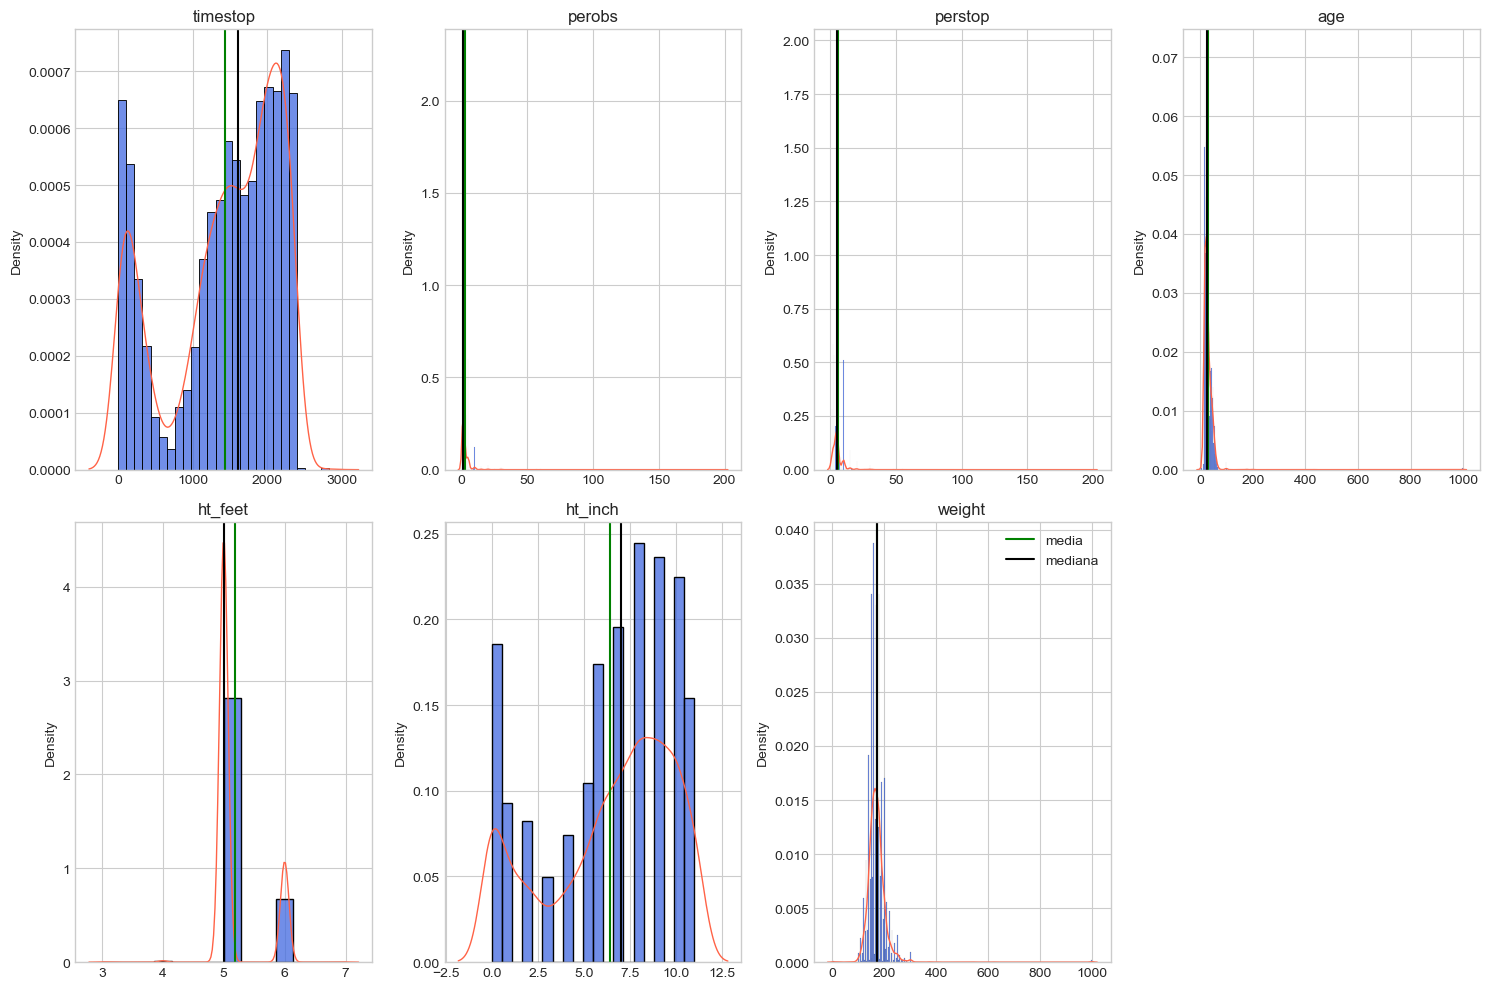

In [25]:
graficar_cont(df_train, lista_numeros, distr='density',figura=(15,10), sep_plot=0.4, cols=4)

* perobs, perstop, age y weight muestran alta ocncentracion de outliers.
* timestop cuando son las 0000 son las 12, 1000 son las 10, 2000 las 20 hrs llegando hasta las 2400 correspondiente a las 24 hrs.
* Dicho esto tiene sentido su comportamiento en relacion al aumento del crimen en horarios nocturnos.
* recodificar la hora de detención en.

In [26]:
valores_tiempo = list(set(df_train['timestop'].to_list()))
valores_tiempo.sort()
valores_tiempo

[0,
 1,
 2,
 3,
 4,
 5,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 30,
 31,
 32,
 33,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 43,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 112,
 113,
 115,
 116,
 118,
 119,
 120,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 144,
 145,
 146,
 147,
 148,
 150,
 153,
 154,
 155,
 158,
 200,
 201,
 202,
 203,
 204,
 205,
 208,
 210,
 211,
 212,
 213,
 215,
 216,
 217,
 218,
 220,
 221,
 222,
 224,
 225,
 227,
 230,
 231,
 232,
 233,
 234,
 235,
 237,
 238,
 240,
 242,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 255,
 257,
 258,
 300,
 302,
 305,
 307,
 308,
 310,
 311,
 312,
 314,
 315,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 330,
 331,
 333,
 334,
 335,
 338,
 339,
 340,
 341,
 343,
 345,
 346,
 347,
 348,
 349

* En el editor de texto se observa que la variable va de 0 a 2830
    - 0 indicaria las 0000 hasta las 2400
    - los valores 2755 y 2830 se eliminarán.

In [27]:
#obtener el indice de las filas a eliminar
drop_time = df_train['timestop'].loc[df_train['timestop'] > 2400].index
df_train = df_train.drop(index=drop_time)

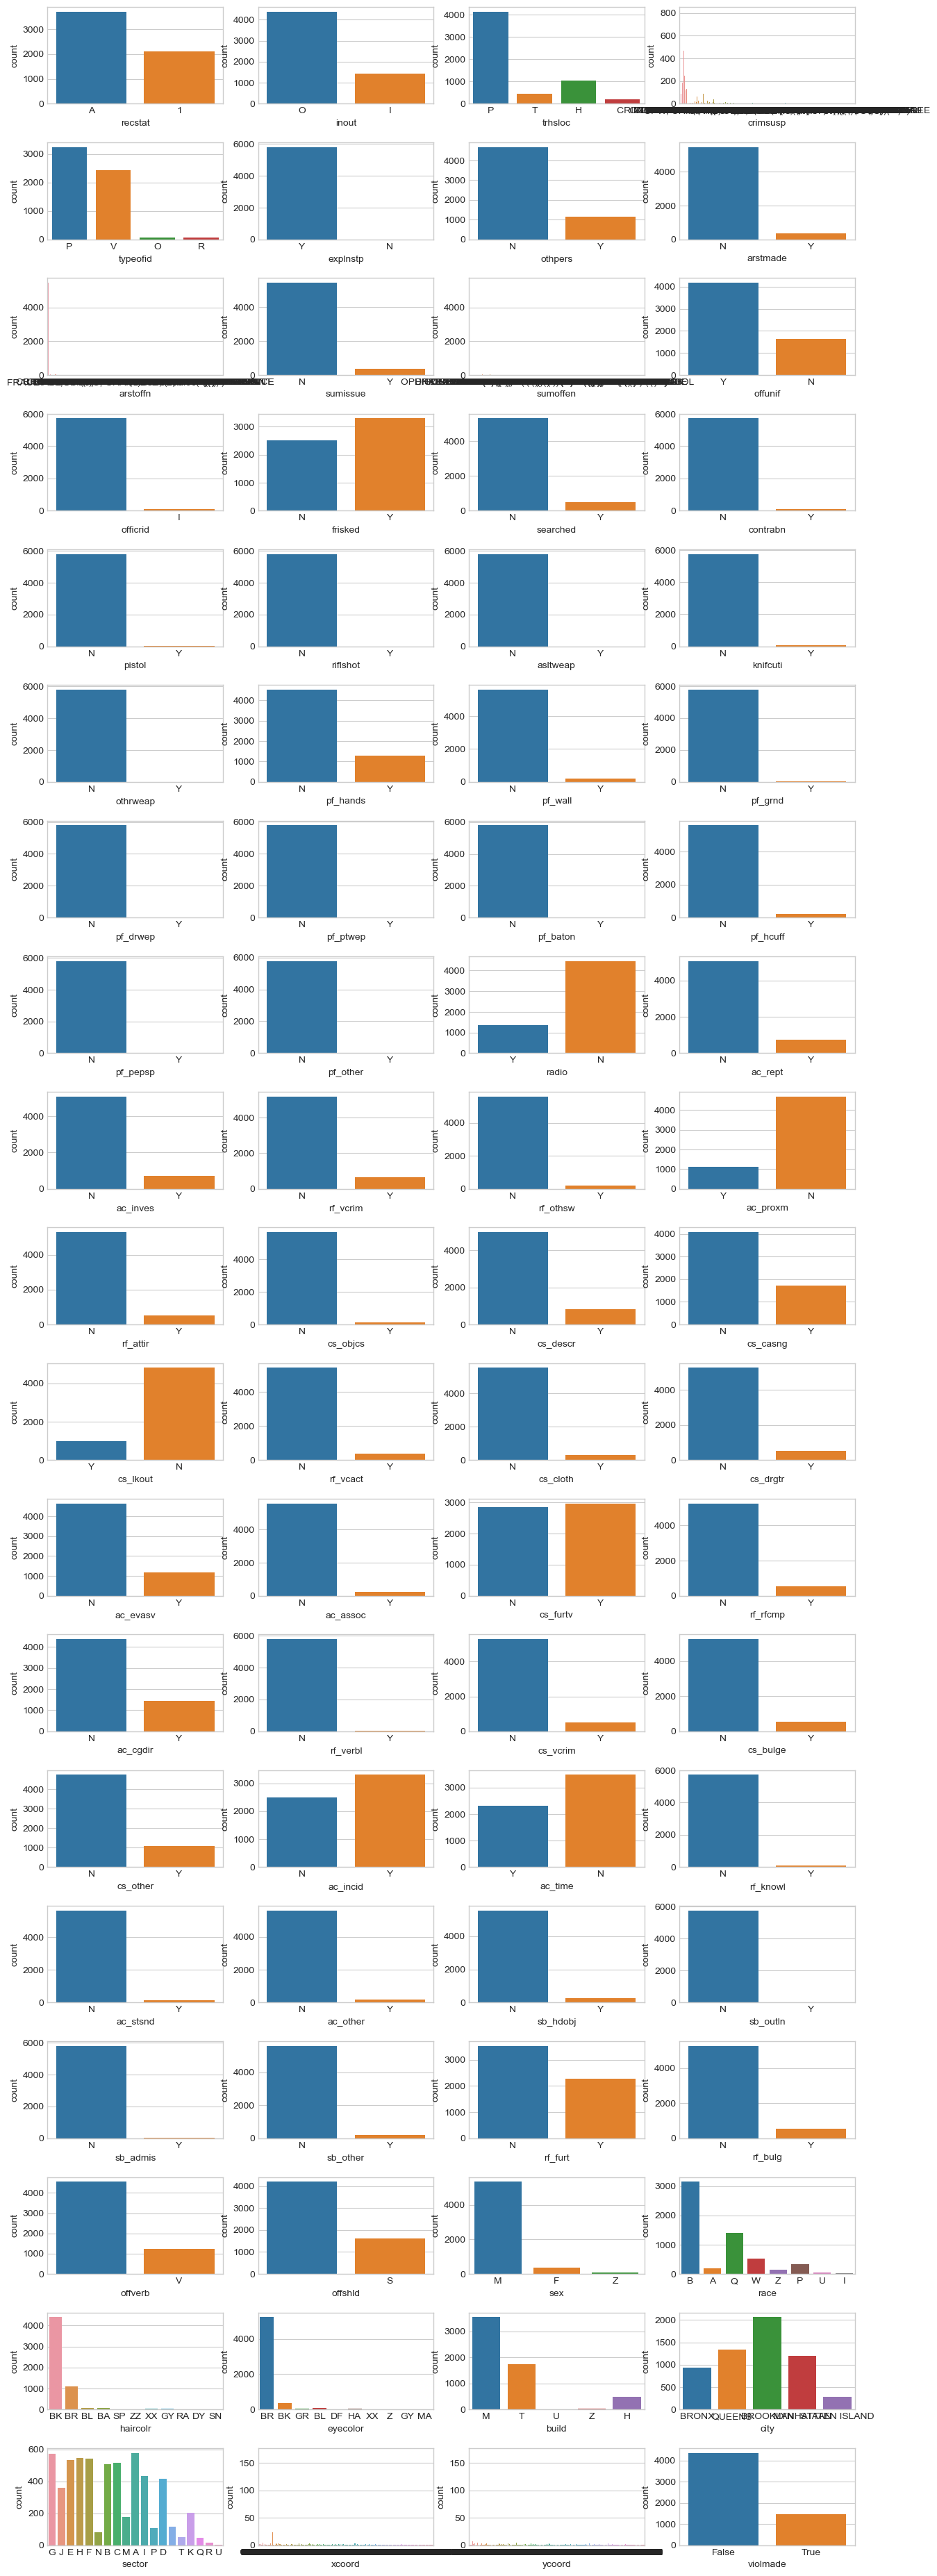

In [28]:
figura=(15,50)
fig = plt.figure(figsize=figura)  # tamaño de la figura
fig.subplots_adjust(hspace=.4)  # ajuste de las subplots
for n,col in enumerate(lista_objects):
    plt.subplot(20,4,n+1)
    sns.countplot(data=df_train,x=col)

* En offcrid, offverb y offshld hace referencia a como se identifica un policia si no esta en uniforme, entonces la categoria sin asignar corresponderia a un oficial uniformado si es que fuesen dos las opciones.
* Se asumira este comportamiento y se asignara a la categoria con espacio en blanco 'No' para indicar que no fue requerido o no fue necesario.

In [29]:
outliers = ['perobs','perstop', 'age', 'weight' ]
lista_barh = ['crimsusp','arstoffn', 'sumoffen']

#### 1.2.2.d- Recodificación de vacíos

Del grafico anterior se observan atributos con solo un valor asignado, estos seran tratados simplemente como N de no aplica o no observable

In [30]:
df_train['offverb'] = np.where(df_train['offverb'] == ' ', 'N', df_train['offverb'])
df_train['offverb'].value_counts()

N    4558
V    1252
Name: offverb, dtype: int64

In [31]:
df_train['offshld'] = np.where(df_train['offshld'] == ' ', 'N', df_train['offshld'])
df_train['offshld'].value_counts()

N    4203
S    1607
Name: offshld, dtype: int64

In [32]:
df_train['officrid'] = np.where(df_train['officrid'] == ' ', 'N', df_train['officrid'])
df_train['officrid'].value_counts()

N    5726
I      84
Name: officrid, dtype: int64

In [33]:
_ , _ = estudio_nulos(df_train, ' ')

trhsloc: 205
arstoffn: 5462
sumoffen: 5454
sector: 116
xcoord: 168
ycoord: 168


In [34]:
#¿EL LUGAR FUE VIVIENDA O AUTORIDAD DE TRÁNSITO?
df_train['trhsloc'] = np.where(df_train['trhsloc'] == ' ', 'OTRO', df_train['trhsloc'])
df_train['trhsloc'].value_counts()

P       4146
H       1026
T        433
OTRO     205
Name: trhsloc, dtype: int64

##### 1.2.4a - Recodificación del vacíos **arstoffn**

* Se analiza la variedad de cartegorias distintas con el fin de agrupar un poco las tendencias mas comunes o palabras similares separadas en dos variables.
* Como investigador no se es experto en la materia, por lo que existe posibilidad de no agrupar de la mejor manera las categorías

<Axes: title={'center': 'arstoffn'}>

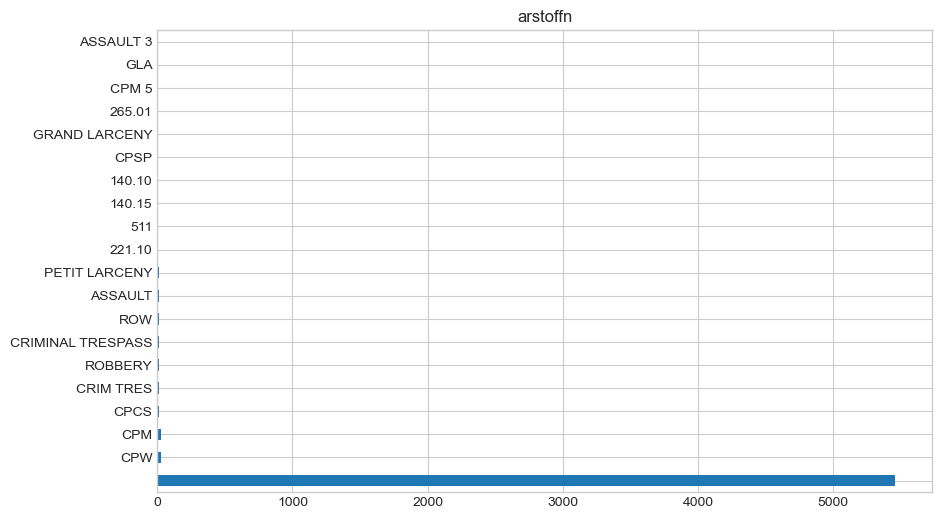

In [35]:
df_train['arstoffn'].loc[df_train['arstoffn'] != ''].value_counts()[:20].plot(kind='barh',title='arstoffn')

* Se codificara un enfoque mas preciso las categorias mas frecuentes, y como 'OTROS' las categorias con menor frecuencia, y las vacías como NA de no aplica. Esto con el fin de agrupar mejor los datos.
* Cuando haya mas de una ocurrencia se carga al de mayor frecuencia.
* Tambien se realiza inspeccion visual en busca de elementos comunes o mal escritos.

In [36]:
#obtenemos las lista para el diccionario de recodificacion
df_train['arstoffn'].unique()


array([' ', '1050.7J', 'CPW', 'CPCS', 'GLA', 'CRIM TRES', 'CRIM TRES/UPM',
       'CPM', '221.10', 'ROBBERY', 'ROW', 'ASSAULT', '511.1A',
       'CPCS,CPM5', 'DISCON', 'PL165.15 (3)', '155.25', '265.02',
       '145.60', '160.05', 'UNK', '511', 'RESIST/DISCON',
       'CRIMINAL TRESPASS', '165.15(3)', 'P.L. 240.20', 'UNAUTHORIZED',
       'CPW 4', 'CPM 5', 'CPW 2', 'GRAND LARC', 'P.L. 140.15', 'CT/CPM',
       'BURGLARY', '265', 'ATT BURGLARY', 'CPCS 7TH', 'PL 265.03 CPW',
       'CRIMINAL MISCHIEF', 'CSM', 'TRESPASS', 'PL 155.25',
       'FORGED INSTRUMENT', '140.15', '10-125 2B',
       'FRAUD ACCOSTING, GRANDLARCENY', 'TOS', 'PL165.4', '265.01',
       '221.01', '140.10', 'PL 120.00', '221-10', '170.25 / 140.35',
       '165.15 3', '160.10', '220.16', '155.25 145.00', 'CRIM TRESPASS',
       'PROSTITUTION', '130.52', 'PL  130.52', 'CPCS7', '221.0',
       'CRI TRES', 'RETURN ON WARRANT', '165 15 (3)',
       'UNLIC GENERAL VENDOR', 'AGG. PANHANDLING', 'PL 24.20',
       'CRIM COUNTE

In [37]:
#Diccionario recod gla
crimen_recod = {' ':'NA',
                '1050.7J':'1050',
                'CPW':'CPW',
                'CPCS':'CPCS',
                'GLA':'OTRO',
                'CRIM TRES':'CRIM TRES',
                'CRIM TRES/UPM':'CRIM TRES',
                'CPM':'CPM',
                '221.10':'221',
                'ROBBERY':'ROBBERY',
                'ROW':'ROW',
                'ASSAULT':'ASSAULT',
                '511.1A':'511',
                'CPCS,CPM5':'CPM',
                'DISCON':'OGA',
                'PL165.15 (3)':'165',
                '155.25':'155',
                '265.02':'265',
                '145.60':'145',
                '160.05':'160',
                'UNK':'OTRO',
                '511':'511',
                'RESIST/DISCON':'DISCON',
                'CRIMINAL TRESPASS':'CRIM TRES',
                '165.15(3)':'165',
                'P.L. 240.20':'240',
                'UNAUTHORIZED':'CRIM TRES',
                'CPW 4':'CPW',
                'CPM 5':'CPM',
                'CPW 2':'CPW',
                'GRAND LARC':'GRAND LARCENY',
                'P.L. 140.15':'140',
                'CT/CPM':'CPM',
                'BURGLARY':'BURGLARY',
                '265':'265',
                'ATT BURGLARY':'BURGLARY',
                'CPCS 7TH':'CPCS',
                'PL 265.03 CPW':'CPW',
                'CRIMINAL MISCHIEF':'CRIMINAL MISCHIEF',
                'CSM':'OTRO',
                'TRESPASS':'CRIM TRES',
                'PL 155.25':'155',
                'FORGED INSTRUMENT':'UNLIC',
                '140.15':'140',
                '10-125 2B':'10-125',
                'FRAUD ACCOSTING, GRANDLARCENY':'GRAND LARCENY',
                'TOS':'OTRO',
                'PL165.4':'165',
                '265.01':'265',
                '221.01':'221',
                '140.10':'140',
                'PL 120.00':'120',
                '221-10':'221',
                '170.25 / 140.35':'140',
                '165.15 3':'165',
                '160.10':'160',
                '220.16':'220',
                '155.25 145.00':'155',
                'CRIM TRESPASS':'CRIM TRES',
                'PROSTITUTION':'PROSTITUTION',
                '130.52':'130',
                'PL  130.52':'130',
                'CPCS7':'CPCS',
                '221.0':'221',
                'CRI TRES':'CRIM TRES',
                'RETURN ON WARRANT':'WARRANT',
                '165 15 (3)':'165',
                'UNLIC GENERAL VENDOR':'UNLIC',
                'AGG. PANHANDLING':'OTRO',
                'PL 24.20':'OTRO',
                'CRIM COUNTERFIET':'OTRO',
                'GRAND LARCENY AUTO':'GRAND LARCENY',
                'CPCS 3 CRIM TRESPASS':'CRIM TRES',
                'ASSAULT 3':'ASSAULT',
                'OPEN CONTAINER':'CRIM TRES',
                'CPSP / GRAFITTI':'CPSP',
                'CRIM TRESS':'CRIM TRES',
                'PL':'OTRO',
                '120.20':'120',
                '140.10/ROW':'ROW',
                'GRAND LARCENY':'GRAND LARCENY',
                'AC 153.09':'OTRO',
                '120.25':'120',
                'OGA':'OGA',
                '220.06':'220',
                '245.00':'OTRO',
                '140.10 P.L.':'140',
                'UNLIC VENDOR':'OTRO',
                '215.40':'OTRO',
                'MAKING GRAFFITI':'OTRO',
                'ASSLT':'ASSAULT',
                'ROBBERY 2':'ROBBERY',
                'PETIT LARCENYE':'PETIT LARCENY',
                'PL 120.00(1)':'120',
                'OGA DISCON':'OGA',
                'ROB 2':'ROBBERY',
                'UNKOWN':'OTRO',
                '140.10 PL':'140',
                'CRIMINAL TRESSPASS':'CRIM TRES',
                '165.15':'165',
                'PETIT LARCENY':'PETIT LARCENY',
                'PL155.25':'155',
                'THEFT OF SERVICE':'OTRO',
                'ASSAULT  3':'ASSAULT',
                '10-133B,  205.30':'OTRO',
                'CPCS 7':'CPCS',
                '221.40':'221',
                'CPSP':'CPSP',
                '16571':'165',
                'CPM3':'CPM',
                '145.05':'145',
                'CPFI':'OTRO',
                'AGG. LIC.':'OTRO',
                '165.10':'165',
                '145.60 02':'145',
                'CRIMINAL POSSESSION OF WEAPON':'OTRO',
                'DICSON':'OGA',
                'RECKLESS ENDANGERMENT':'OTRO',
                "OBSTRUCT GOV'T ADMINISTRATION":'OTRO',
                '1050.9D':'1050',
                '170.25':'170',
                '220.16PL':'220',
                'PL 145.05 (2)':'145',
                'CSCS':'OTRO',
                'PL 221.10 PL 240.35 (2) PL 205':'221',
                'ASSAULT/CPW':'CPW',
                'CRIM MISC':'OTRO',
                'CRIM CONTEMPT':'OTRO',
                'XXX':'OTRO',
                'CPW 4DEGREE':'CPW',
                'CRIM. TRESS.':'CRIM TRES',
                'PL 165.15':'165',
                '170.15':'170',
                '221.15':'221',
                'UGV':'OTRO',
                'BURG':'BURGLARY',
                '265.01 CPW':'CPW',
                '1050.7(J)':'1050',
                '1192-1':'OTRO',
                '155.30 (1)':'155',
                '220.03':'220',
                '10-125':'10-125',
                '160.10 (01)':'160',
                'SEX ABUSE':'SEX ABUSE',
                '221.40 / 221.05':'221',
                'CRIMINAL  TRESSPASS':'CRIM TRES',
                'ASS':'ASSAULT',
                'CRIMINAL TAMPERING':'OTRO',
                'CRIM TRES & CPCS 7':'CRIM TRES',
                'PL 265.02':'265',
                'CRIM IMPER':'OTRO',
                'ASSAULT 2':'ASSAULT',
                'FALSE PERS/WARRANT':'WARRANT',
                'CPM/CRIM TRES':'CPM',
                'CPCS/TAMP W/ EVIDENCE':'CPCS',
                '10-118 B':'OTRO',
                'CPCS 3':'CPCS',
                '240.10':'240',
                '221.05/ROW':'ROW',
                'CPW 265.01':'CPW',
                'CT':'CRIM TRES',
                '20-465 (B) / WARRANT':'WARRANT',
                '190.25':'OTRO',
                'ASSAULT ON PO':'ASSAULT'}

<Axes: title={'center': 'arstoffn'}>

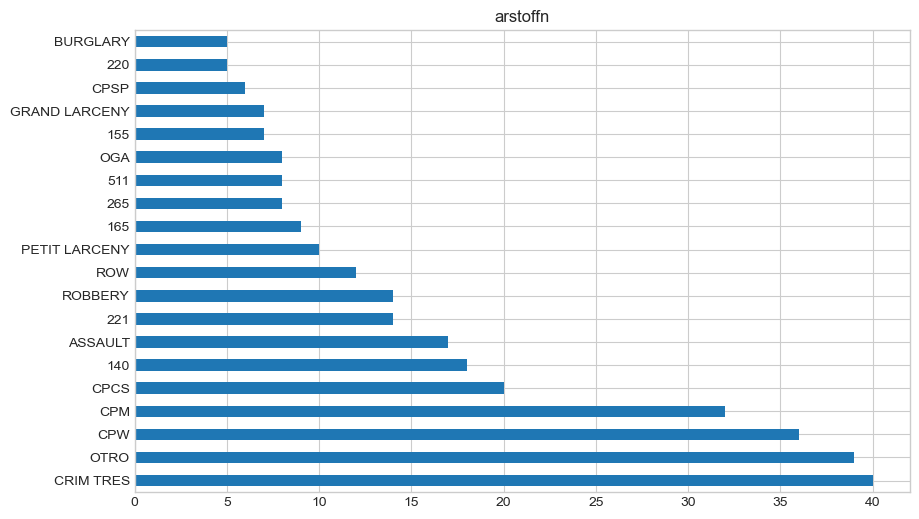

In [38]:
df_train['arstoffn'] = df_train['arstoffn'].replace(crimen_recod)
df_train['arstoffn'].loc[df_train['arstoffn'] != 'NA'].value_counts()[:20].plot(kind='barh',title='arstoffn')

* Mediante la codificacion del atributo se logra equiparar la concentracion de 'otros' con el resto de las categorías.

##### 1.2.4b - Recodificación del vacíos **sumoffen**

<Axes: title={'center': 'sumoffen'}>

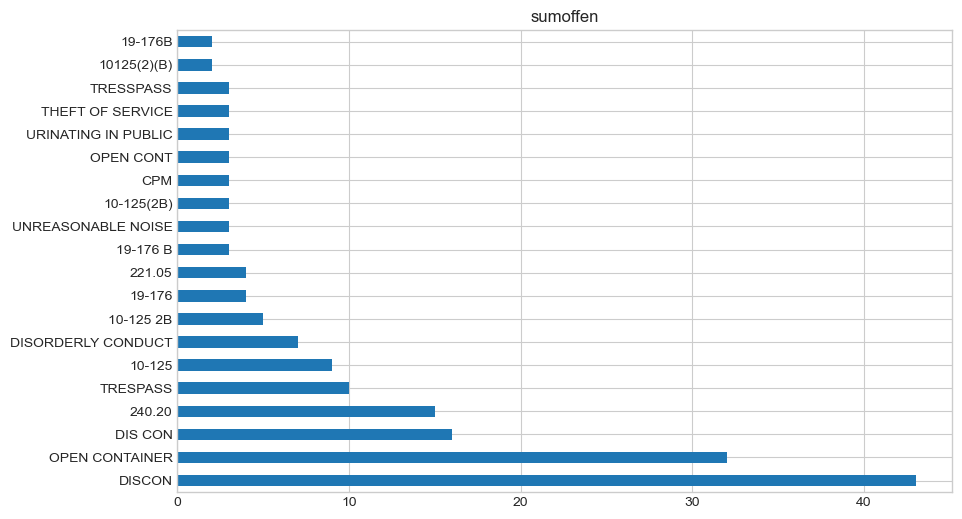

In [39]:
df_train['sumoffen'].loc[df_train['sumoffen'] != ' '].value_counts()[:20].plot(kind='barh',title='sumoffen')

<Axes: xlabel='sumoffen', ylabel='Count'>

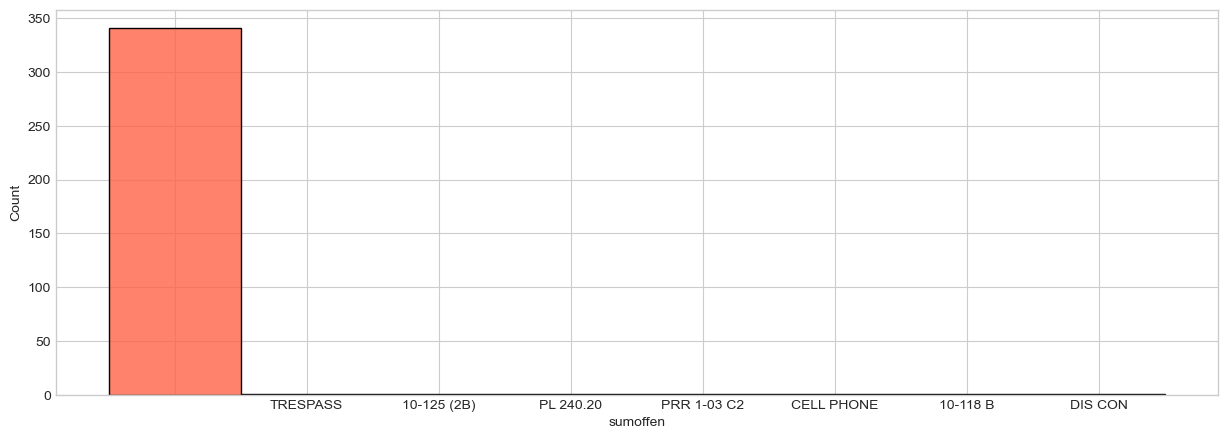

In [40]:
tmp_df = df_train.loc[df_train['arstmade']=='Y']
plt.figure(figsize=(15,5))
sns.histplot(data=tmp_df, x='sumoffen', alpha=0.8,color='tomato')

In [41]:
tmp_df['sumoffen'].value_counts()

               341
TRESPASS         1
10-125 (2B)      1
PL 240.20        1
PRR 1-03 C2      1
CELL PHONE       1
10-118 B         1
DIS CON          1
Name: sumoffen, dtype: int64

* Son muy pocas las categorías que llevan a arrestos por lo que no se enfatizará tanto en deglosar la categoría 'OTRO'

In [42]:
#obtenemos las lista para el diccionario de recodificacion
df_train['sumoffen'].unique()

array([' ', 'UNREASONABLE NOISE', 'DISORDERLY CONDUCT', '240.20 (5)',
       '1110A VTZ', '65 C1', '10-125 (2)B', 'OPERATING BIKE ON SIDEWALK',
       'DIS CON', '37512AB', 'TRESPASS', '10-125', '19-176B', '240.35',
       'OPEN CONTAINER', '10-125 2B', '240.20', 'NO PLATE',
       'OPEN CONATINER', 'VTL1212', '10-125(2)', '19.176 (B)',
       '10-125(2B)', 'DISCON', 'DISOBEYING PARK RULES', 'UPM', '375-',
       '140-05', '1-03C2', '24-163', '19-176 C', '509.1', '16-118.6',
       'ALCOHOL', 'OPEN CONT', '161.04', 'DIS-CON', 'UNLIC OP',
       'UNDER 21 POSSESS ALCOHOL', '140.05', 'UNREASONALBE NOISE',
       '10-1251 2B', '1229 C 3 A', '140.50', 'IMPROPER PLATE',
       'HC 153.09', 'TRESPASSING', '221.05', '12259C2A VTL',
       '10-125 (2B)', '1-03 CD2', '240.20 (7)', '240.20.5', '103-2',
       '153-09', '10-134(1) BOXCUTTER', 'PARK AFTER DUSK', '240.20 7',
       '19-176', '1050.9D', 'URINE IN PUBLIC', '240.20 1PL', 'AC 24-218',
       '10-133', 'LITTERING', '1110A VTL', 'SUSPEND

In [43]:
#  19-176
offen_recod = {' ':'NA',
              'UNREASONABLE NOISE':'UNREASONABLE NOISE',
              'DISORDERLY CONDUCT':'DISORDERLY CONDUCT',
              '240.20 (5)':'240',

              '1110A VTZ':'OTRO',
              '65 C1':'OTRO',
              '10-125 (2)B':'10-125',
              'OPERATING BIKE ON SIDEWALK':'DRIVING BAD',

              'DIS CON':'DISCON',
              '37512AB':'OTRO',
              'TRESPASS':'TRESPAS',
              '10-125':'10-125',
              '19-176B':'19-176',
              '240.35':'240',

              'OPEN CONTAINER':'OPEN ALCOHOL',
              '10-125 2B':'10-125',
              '240.20':'240',
              'NO PLATE':'DRIVING BAD',

              'OPEN CONATINER':'OPEN ALCOHOL',
              'VTL1212':'OTRO',
              '10-125(2)':'10-125',
              '19.176 (B)':'OTRO',

              '10-125(2B)':'10-125',
              'DISCON':'DISCON',
              'DISOBEYING PARK RULES':'DRIVING BAD',
              'UPM':'OTRO',
              '375-':'OTRO',

              '140-05':'140',
              '1-03C2':'PRR1-03',
              '24-163':'OTRO',
              '19-176 C':'19-176',
              '509.1':'OTRO',
              '16-118.6':'OTRO',

              'ALCOHOL':'OPEN ALCOHOL',
              'OPEN CONT':'OPEN ALCOHOL',
              '161.04':'OTRO',
              'DIS-CON':'DISCON',
              'UNLIC OP':'OTRO',

              'UNDER 21 POSSESS ALCOHOL':'OPEN ALCOHOL',
              '140.05':'140',
              'UNREASONALBE NOISE':'UNREASONABLE NOISE',

              '10-1251 2B':'10-125',
              '1229 C 3 A':'OTRO',
              '140.50':'140',
              'IMPROPER PLATE':'DRIVING BAD',

              'HC 153.09':'OTRO',
              'TRESPASSING':'TRESPAS',
              '221.05':'221.05',
              '12259C2A VTL':'OTRO',

              '10-125 (2B)':'10-125',
              '1-03 CD2':'PRR1-03',
              '240.20 (7)':'240',
              '240.20.5':'240',
              '103-2':'OTRO',

              '153-09':'OTRO',
              '10-134(1) BOXCUTTER':'ARMA BLANCA',
              'PARK AFTER DUSK':'DRIVING BAD',
              '240.20 7':'240',

              '19-176':'19-176',
              '1050.9D':'OTRO',
              'URINE IN PUBLIC':'URINATING IN PUBLIC',
              '240.20 1PL':'240',
              'AC 24-218':'OTRO',

              '10-133':'OTRO',
              'LITTERING':'URINATING IN PUBLIC',
              '1110A VTL':'OTRO',
              'SUSPENDED REG':'OTRO',
              '10125(2)(B)':'OTRO',

              'PL 240.20':'240',
              '10-125 2(B) AC':'10-125',
              'VTL':'OTRO',
              '161-':'OTRO',
              '240-20':'240',

              'TINTED GLASS':'DRIVING BAD',
              '509 1':'OTRO',
              '193176.26':'OTRO',
              '1-03 C(2)':'PRR1-03',
              'POSS KNIFE':'ARMA BLANCA',

              '10-137':'OTRO',
              '10-25-2-B':'OTRO',
              'URINATING IN PUBLIC':'URINATING IN PUBLIC',
              'OUTSTRETCHED':'OTRO',

              'BOXCUTTER IN PUBLIC':'ARMA BLANCA',
              'MACE':'OTRO',
              'OPEN CONT ALCOHOL':'OPEN ALCOHOL',
              '10.125.2 (B)':'OTRO',

              '240.20 SUB 5':'240',
              '101252B':'OTRO',
              '19-176 (B)':'19-176',
              'RUNNING RED LIGHT':'DRIVING BAD',

              'TRESSPASS':'TRESPAS',
              '1310-PHL':'OTRO',
              'ILLEGAL WINDOW TINT':'DRIVING BAD',
              'DIS. CON':'DISCON',
              'BOS':'OTRO',

              'THEFT OF SERVICE':'THEFT OF SERVICE',
              '1-03':'PRR1-03',
              'DIS COM':'DISCON',
              '10-118 SUB B':'OTRO',
              '1042510':'OTRO',
              'DISCON- 240.20 (5)':'DISCON',
              'UNLICENSED DRIVER':'DRIVING BAD',
              'BIKE ON SIDEWALK':'DRIVING BAD',

              'KNIFE IN PUBLIC VIEW':'ARMA BLANCA',
              '161.05':'OTRO',
              '1010 VTL':'OTRO',
              'PL 240.20 (5)':'240',

              'VTL11104':'OTRO',
              '1212 VTL':'OTRO',
              'RUN STOP SIGN':'DRIVING BAD',
              'UNKNOWN':'DISCON',
              '1-63 C2':'OTRO',

              'CPW':'CPW',
              '240.20 (3)':'240',
              'AC 19476 (C)':'OTRO',
              '153.09':'OTRO',
              'RECKLESS DRIVING':'DRIVING BAD',

              'DIS CON.':'DISCON',
              'DISCON 240.20':'DISCON',
              'PUBLIC URINATION':'URINATING IN PUBLIC',
              'PRR 1-03':'PRR1-03',

              'PRR 1-03 C2':'PRR1-03',
              '24-227':'OTRO',
              '1-03 C2':'PRR1-03',
              '240.20(1)':'240',
              'CPM':'CPM',
              '181.03':'OTRO',

              '19-176 (C) AC':'19-176',
              'DRIVING ON CELL PHONE':'DRIVING BAD',
              '16-118(1) AC':'OTRO',
              '24-218':'OTRO',

              '240.20 (50':'240',
              'DISCON 240.201':'240',
              'CELL PHONE':'DRIVING BAD',

              'KNIFE IN PUBLIC VIEW (DISCON)':'ARMA BLANCA',
              'OPER BIKE SIDEWALK':'DRIVING BAD',
              'STOP SIGN':'DRIVING BAD',

              'AC10-120':'OTRO',
              'DISCON 240.20-5':'240',
              '1225C2A':'OTRO',
              '125-2B':'OTRO',
              'NO INSURANCE':'DRIVING BAD',

              'FAILURE TO OBEY RULE':'OTRO',
              'A.C. 10-125 2(B)':'10-125',
              'AC 16-122(C)':'OTRO',

              '1050.7J':'OTRO',
              '319.1':'OTRO',
              'PL 140.05':'140',
              'TINTS':'DRIVING BAD',
              '10125-2B':'OTRO',

              'PARK AFTER DARK':'DRIVING BAD',
              'NO ID':'NO ID',
              'PRR 103A2':'OTRO',
              '153.09 HC':'OTRO',
              '319-1':'OTRO',

              '240.20 ( 1 )':'240',
              '19176B':'OTRO',
              '19-506':'OTRO',
              'VTL 1125 A':'OTRO',
              '240.20 6':'240',

              'BICYCLE ON SIDEWALK':'DRIVING BAD',
              'LOITERING/GAMBLING':'OTRO',

              'ILLEGAL POSTING SIGNS':'OTRO',
              'VTL 319-1':'OTRO',
              'OPEN CONTAINER OF ALCOHOL':'OPEN ALCOHOL',

              'RIDING BIKE ON SIDEWALK':'DRIVING BAD',
              '1050.9(D)':'OTRO',
              'TINT':'DRIVING BAD',
              'AC 10-133':'OTRO',
              'UNK':'DISCON',

              '103-C2':'OTRO',
              '240.26 SUB 6':'240',
              'UTL 1172':'OTRO',
              'UNLEASHED DOG':'OTRO',

              '16-118 SUB 6':'OTRO',
              'PL 240.20(2)':'240',
              'FAIL TO AFFIX LIC PLATE':'DRIVING BAD',

              '19-121':'OTRO',
              '19-176 B':'19-176',
              '240.20 PL':'240',
              'PRR 1-04':'OTRO',

              'DIS CON - FIGHTING':'DISCON',
              '10-118 B':'OTRO',
              '153.04HC':'OTRO',
              'FARE EVASION':'DRIVING BAD',

              'LOUD NOISE':'UNREASONABLE NOISE',
              '10-125 2AA/C':'10-125',
              'P.L. 240.20    9010':'240',
              'VTL 809.01':'OTRO',

              'UNSAFERIDING':'DRIVING BAD',
              '19-1256 AC':'OTRO',
              '240-20(21)':'240'}

<Axes: title={'center': 'sumoffen'}>

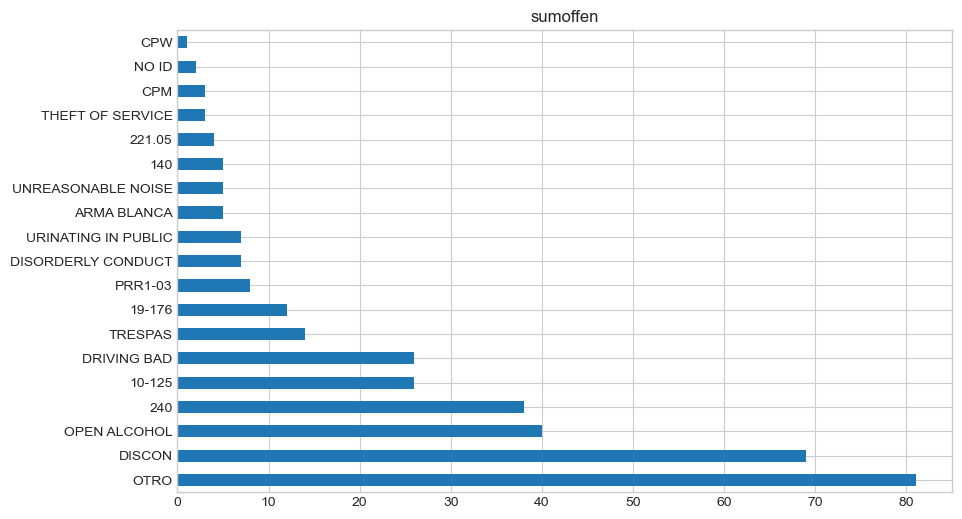

In [44]:
df_train['sumoffen'] = df_train['sumoffen'].replace(offen_recod)
df_train['sumoffen'].loc[df_train['sumoffen'] != 'NA'].value_counts()[:20].plot(kind='barh',title='sumoffen')

##### 1.2.5 - Imputacion por frecuencias

In [45]:
_ , lista_vacios = estudio_nulos(df_train, ' ')

sector: 116
xcoord: 168
ycoord: 168


In [46]:
for i in lista_vacios:
    df_train[i] = df_train[i].replace({' ':np.nan})


In [47]:
contar_nan(df_train, lista_vacios)

sector: 1.9966%

xcoord: 2.8916%

ycoord: 2.8916%

% de lineas con nan en la data 3.8382%


* 3.8% de las filas corresponden a NaN, se tiene una cantidad mas que razonable para imputar por el mas frecuente.

In [48]:
imputador, df_train = entrenar_imputador(data=df_train, strategy='most_frequent', missing_val=np.nan)

In [49]:
contar_nan(df_train, lista_vacios)

sector: sin nulos
xcoord: sin nulos
ycoord: sin nulos
% de lineas con nan en la data 0.0%


In [50]:
_ , lista_vacios = estudio_nulos(df_train, ' ')

* Finalmente no quedan celdas vacias ni np.nan en la base de datos

#### 1.2.3 Recodificación del vector objetivo (Explicativo)

##### 1.2.3.a Vector objetivo a modo representativo

se indicará la conversion a utilizar, sin embargo si se vuelven a dropear filas en los siguientes pasos se deberá volver a codificar los dummies.

In [51]:
y_a = pd.get_dummies(df_train['arstmade'], drop_first=True)
y_b = pd.get_dummies(df_train['violmade'], drop_first=True)

In [52]:
y_a.value_counts()

Y
0    5462
1     348
dtype: int64

In [53]:
y_b.value_counts()

True
0       4358
1       1452
dtype: int64

* Luego de la recodificacion se observan categorias desbalanceadas, con mayor concentracion en el 0 que implica la no ocurrencia del arresto o de un hecho de violencia

#### 1.2.4 - Busquedas de grilla propuestas

* Grilla modelo LDA:
    - 'solver': ['svd', 'lsqr', 'eigen']
    - 'priors': [[.35,.65],[.4,.6],[.45,.55],[.55,.45],[.6,.4],[.65,.35]]
* Grilla modelo SVC:
    - 'C' : [1,100]
    - 'gamma': [10, 100]
    - 'kernel': ['rbf']
* Grilla modelo Random Forest:
    - 'max_depth':[100,None]
    - 'criterion':['gini','entropy']
    - 'min_samples_split':[0.001,0.1]
    - 'min_samples_leaf':[0.0000001,0.001]
* Grilla modelo Gradient Boost
    - 'learning_rate': [0.0001,0.01,1]
    - 'max_depth':[1, 10,100]
    - 'subsample': [.1,.3,.4]
* Ponderacion para modelos Voting respectivamente {voting categoria 0, voting balanceado, gradient boosting}:
    - w1 = [.3, .2, .5 ]
    - w2 = [.2, .2, .6 ]

## Hito 2

### 2.1 Análisis exploratorio

#### 2.1.1 Análisis especificos.

##### 2.1.1a - Outliers

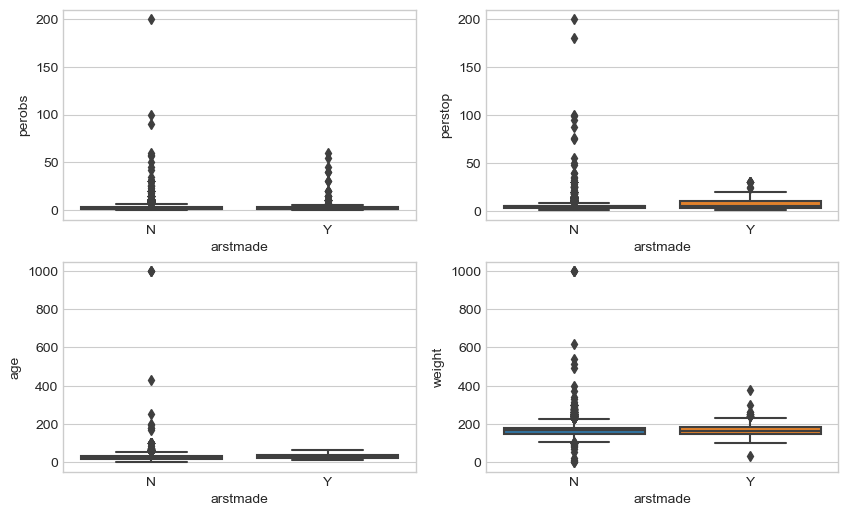

In [54]:
for n,col in enumerate(outliers):
    plt.subplot(2,2,n+1)
    sns.boxplot(data=df_train, y=col, x='arstmade')

* Alta presencia de outliers en las variables.
* perobs vs perstop, no se puede hacer mucho ya que es el comportamiento del atributo
* Para age y weight se limpiaran los valores que no correspondan

In [55]:
df_train[outliers].astype('int').describe(percentiles=[.5,.75,.8,.9])

,perobs,perstop,age,weight
count,5810.000000,5810.000000,5810.000000,5810.000000
mean,2.666093,5.502582,28.873322,169.933907
std,4.817628,5.923429,26.070514,37.656219
min,0.000000,1.000000,1.000000,1.000000
50%,1.000000,5.000000,25.000000,170.000000
75%,3.000000,5.000000,34.000000,180.000000
80%,3.000000,6.000000,38.000000,190.000000
90%,5.000000,10.000000,46.000000,200.000000
max,200.000000,200.000000,999.000000,999.000000


**perobs y perstop**

In [56]:
#media 90% -> 5
df_train['perobs'].loc[df_train['perobs']>5].value_counts().sum()

319

In [57]:
#media 90% -> 10
df_train['perstop'].loc[df_train['perstop']>10].value_counts().sum()

265

* Se dejaran de igual forma, ya que dado su naturaleza parecieran corresponder los datos.
* Si se aplicara una recodificacion, mas no ponderacion o eliminacion de outliers

**weight y age**

In [58]:
df_train['age'].loc[df_train['age']>90].value_counts()

99     12
999     3
196     1
177     1
170     1
100     1
200     1
431     1
250     1
180     1
Name: age, dtype: int64

* se deja como tope la edad de 90

* El hombre más pesado registrado en Estados Unidos fue Jon Brower Minnoch, que pesaba alrededor de 635 kg en su punto máximo en 1978.

In [59]:
df_train['weight'].loc[df_train['weight']>635].value_counts()

999    4
Name: weight, dtype: int64

In [60]:
df_train['age'].loc[df_train['age']>90].value_counts().sum() + df_train['weight'].loc[df_train['weight']>635].value_counts().sum()

27

Age y weight claramente presenta outliers o datos irrelevantes, por lo que se procedera a eliminar las filas con edades del individio mayor a 100 años y eliminar los 4 pesos asignados con 999

In [61]:
drop_age = df_train['age'].loc[df_train['age']>100].index
drop_weight = df_train['weight'].loc[df_train['weight']>650].index

In [62]:
df_train = df_train.drop(index=drop_age)
df_train = df_train.drop(index=drop_weight)

In [63]:
#Porcentaje de filas eliminadas
(1-(df_train.shape[0]/5812))*100

0.2752924982794225

* En total con los datos imputados mas los eliminados se tienen aproximadamente un 4% de los datos totales.

In [64]:
df_train.shape[0]

5796

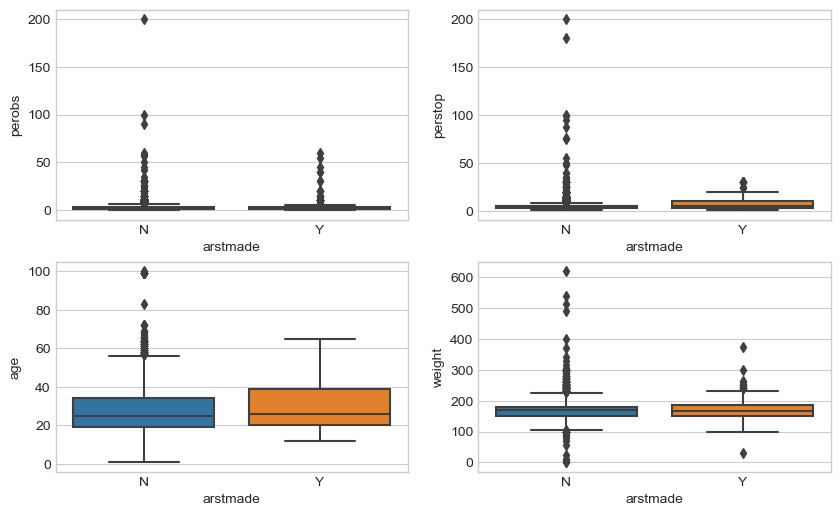

In [65]:
for n,col in enumerate(outliers):
    plt.subplot(2,2,n+1)
    sns.boxplot(data=df_train, y=col, x='arstmade')

* Mucho outlier en la categoria no del atritubo age, sin embargo el quitar los datos mas extremos ayuda a mejorar el comportamiento de los atributos.

##### 2.1.1b - Atributos con muchas categorias distintas visto por vector objetivo:

**Categorias de delitos u ofensas que llevan a arresto o a violencia.**

###### arstmade

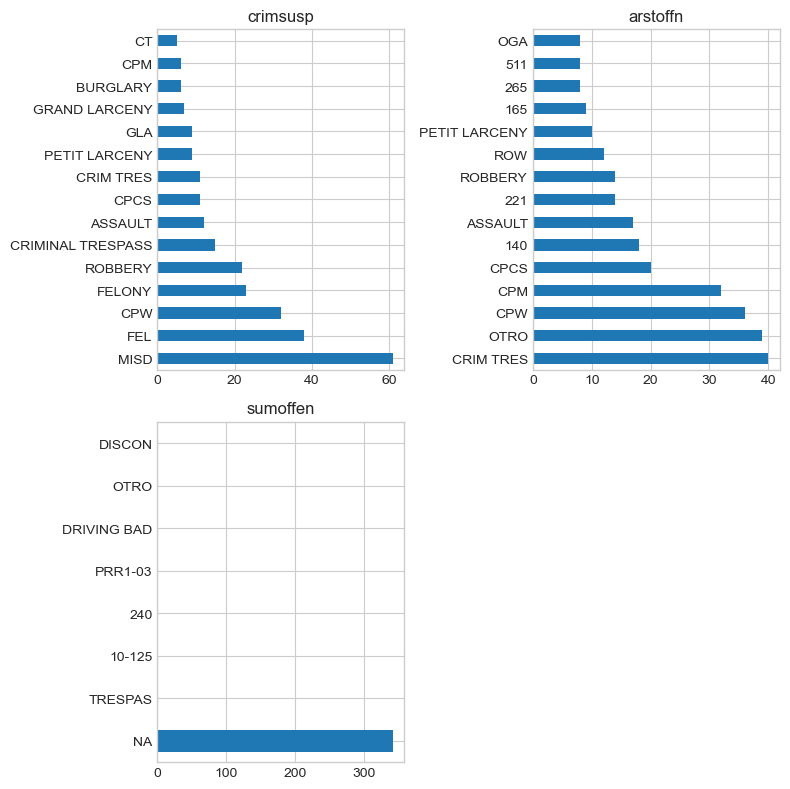

In [66]:
#aislar vector objetivo arstmade
tmp_df = df_train.loc[df_train['arstmade']=='Y']
plt.figure(figsize=(8,8))
for n, col in enumerate(lista_barh):
    plt.subplot(2,2,n+1)
    tmp_df[col].value_counts()[:15].plot(kind='barh',title=col)
    plt.tight_layout()

* El atributo sumoffen es el menos relacionado al vector objetivo arstmade
* Los atributos 'crimsusp' y arstoffn, estan mayormente relacionados con el vector objetivo.

###### violmade

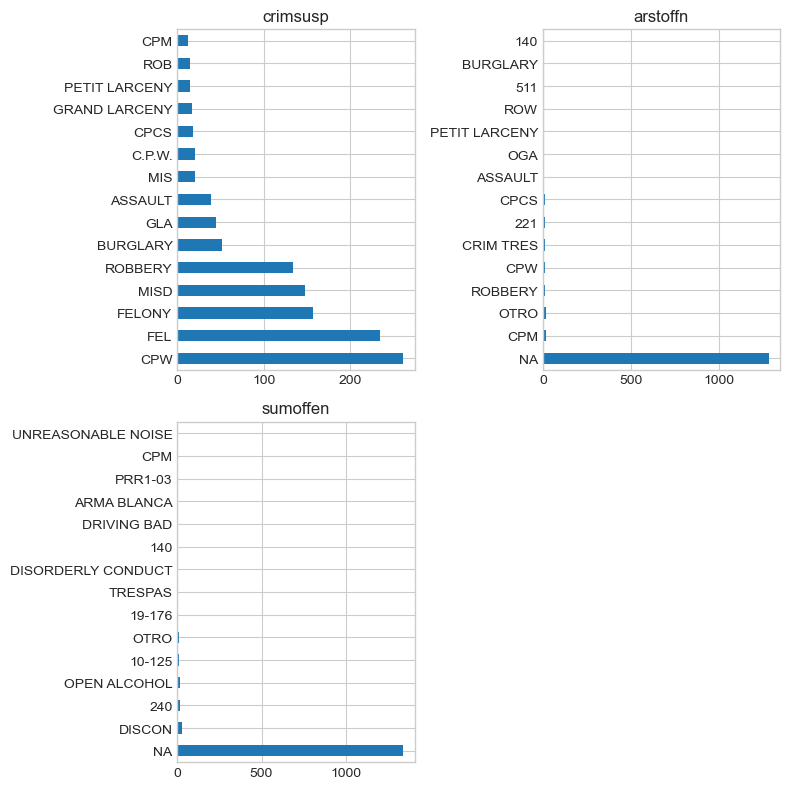

In [67]:
#aislar vector objetivo violmade
tmp_df = df_train.loc[df_train['violmade']=='True']
plt.figure(figsize=(8,8))
for n, col in enumerate(lista_barh):
    plt.subplot(2,2,n+1)
    tmp_df[col].value_counts()[:15].plot(kind='barh',title=col)
    plt.tight_layout()

* Muy destacable que a pesar de ser poco el efecto, en los hechos de violencia cobra una leve importancia sumoffen en comparacion a con arstmade
* Y por el contrario arstoffn baja considerablemente.

##### 2.1.1d - Seleccion de Atributos y recodificaciones para la modelacion:

Dado lo analizado hasta ahora, encontramos la mayoría de atributos categoricos, y los que no, no tiene un comportamiento muy deseable. Sin embargo muestran tener cierta relacion de comportamiento entre los arrestos y la violencia. Para generar un modelo que utilice de mejor manera los atributos se decide hacer todas las variables binarias y desechar las variables continuas. Esto sera util a la hora de implementar un modelo naive-bayes.

In [68]:
#convertir a int dado que el scaler transforma todo a object
numericas = ['timestop', 'perobs', 'perstop', 'age',
             'ht_feet', 'ht_inch', 'weight']

In [69]:
df_train[numericas] = df_train[numericas].astype('int64')

In [70]:
lista_objects , lista_numeros = separar_columnas(df_train, min_filas=2,max_col=5)

Columnas en Obj: 76, en numero: 7, otro: 0

Grillas posibles obj:
Filas = 2, Columnas = 38.0
Filas = 3, Columnas = 26.0
Filas = 4, Columnas = 19.0
Filas = 5, Columnas = 16.0
Filas = 6, Columnas = 13.0

Grillas posibles numericas:
Filas = 2, Columnas = 4.0
Filas = 3, Columnas = 3.0
Filas = 4, Columnas = 2.0
Filas = 5, Columnas = 2.0
Filas = 6, Columnas = 2.0


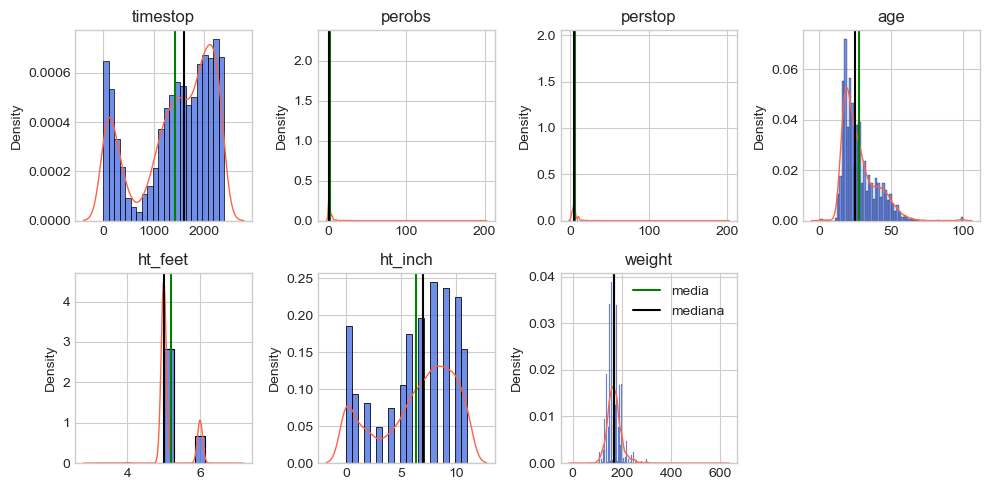

In [71]:
graficar_cont(df_train, lista_numeros, distr='density',figura=(10,5), sep_plot=0.4, cols=4)

* Mejora bastante la claridad de las variables age y weight sin outliers.
* Se aprecia una clara concentracion en las edades que rondan la mediana.
* La media y la mediana no distan demasiado. Podria venir bien realizar una estandarizacion de las variables continuas.

**Timestop**

([<matplotlib.axis.XTick at 0x25d0980f970>,
 [Text(0, 0, '0'),
  Text(235, 0, '235'),
  Text(1175, 0, '1175'),
  Text(2359, 0, '2359')])

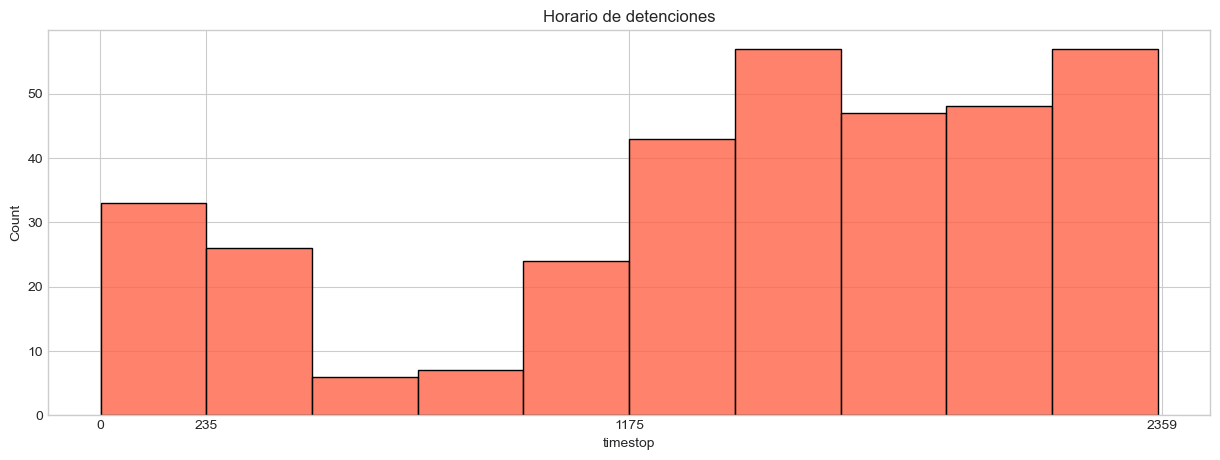

In [72]:
tmp_df = df_train.loc[df_train['arstmade']=='Y']
plt.figure(figsize=(15,5))
sns.histplot(data=tmp_df, x='timestop', alpha=0.8,color='tomato')
plt.title('Horario de detenciones')
plt.xticks([0,235,1175,2359])

* Las concentraciones mas altas de eventos están bordeando los 60.
* Se considera como punto de interes cuando los eventos aumenten a mas 40.
* Del punto anterior extrapolamos la caracteristica binaria de valores entre 0 y 1175 seran horario valle y el resto sera hora pick 

In [73]:
df_train['time_bin'] = np.where((df_train['timestop'] > 1175), 'pick', 'valley')
df_train['time_bin'].value_counts()

pick      4056
valley    1740
Name: time_bin, dtype: int64

**Age y weight**

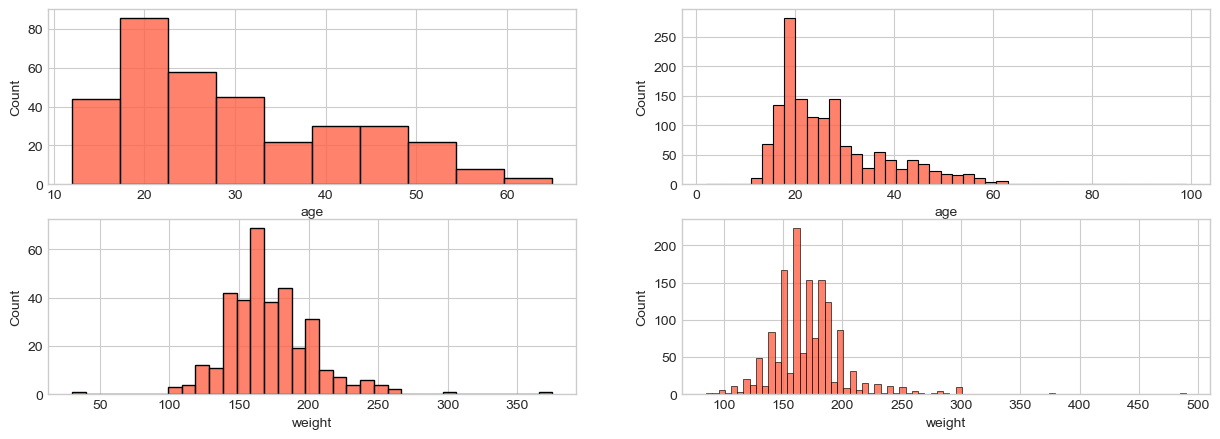

In [74]:
plt.figure(figsize=(15,5))
tmp_df_arst = df_train.loc[df_train['arstmade']=='Y']
tmp_df_viol = df_train.loc[df_train['violmade']=='True']
n = 1
k = 2
for col in ['age', 'weight']:
    plt.subplot(2,2,n)
    sns.histplot(data=tmp_df_arst, x=col, alpha=0.8,color='tomato')
    plt.subplot(2,2,k)
    sns.histplot(data=tmp_df_viol, x=col, alpha=0.8,color='tomato')
    n+=2
    k+=2

* la concentracion de age de los 40 hacia delante es muy baja.
* Se considerará el intervalo central como criterio.
    - 19 =< A >= 34 

In [75]:
df_train['age'].describe()

count    5796.000000
mean       28.133368
std        11.667318
min         1.000000
25%        19.000000
50%        25.000000
75%        34.000000
max       100.000000
Name: age, dtype: float64

In [76]:
df_train['age_bin'] = np.where((df_train['age'] >=19) & (df_train['age'] <= 34), 'Y', 'N')
df_train['age_bin'].value_counts()

Y    3201
N    2595
Name: age_bin, dtype: int64

* En cuanto al peso se comporta de manera 'normal' sin sesgos. 
* Se considerará el intervalo central como criterio.
    - 150 =< W >= 180 

In [77]:
df_train['weight'].describe()

count    5796.000000
mean      169.349551
std        30.737323
min         1.000000
25%       150.000000
50%       170.000000
75%       180.000000
max       620.000000
Name: weight, dtype: float64

In [78]:
df_train['weight_bin'] = np.where((df_train['weight'] >=150) & (df_train['weight'] <= 180), 'Y', 'N')
df_train['weight_bin'].value_counts()

Y    3370
N    2426
Name: weight_bin, dtype: int64

**ht_feet y ht_inch**

* En ht_feet se puede seleccionar altura 5 como la mayor concentracion y los demas agruparlos en otra categoria, ya que corresponde a la media y mediana del atributo
* ht_inch se descarta, ya que es lo mismo que ht_feet pero en otra unidad

In [79]:
df_train[['ht_feet']].value_counts()

ht_feet
5          4674
6          1103
4            15
3             3
7             1
dtype: int64

In [80]:
df_train['ht_feet_bin'] = np.where((df_train['ht_feet'] == 5), 'Y', 'N')
df_train['ht_feet_bin'].value_counts()

Y    4674
N    1122
Name: ht_feet_bin, dtype: int64

**perobs y perstop**

* Separar el nucleo de interes para perobs y perstop

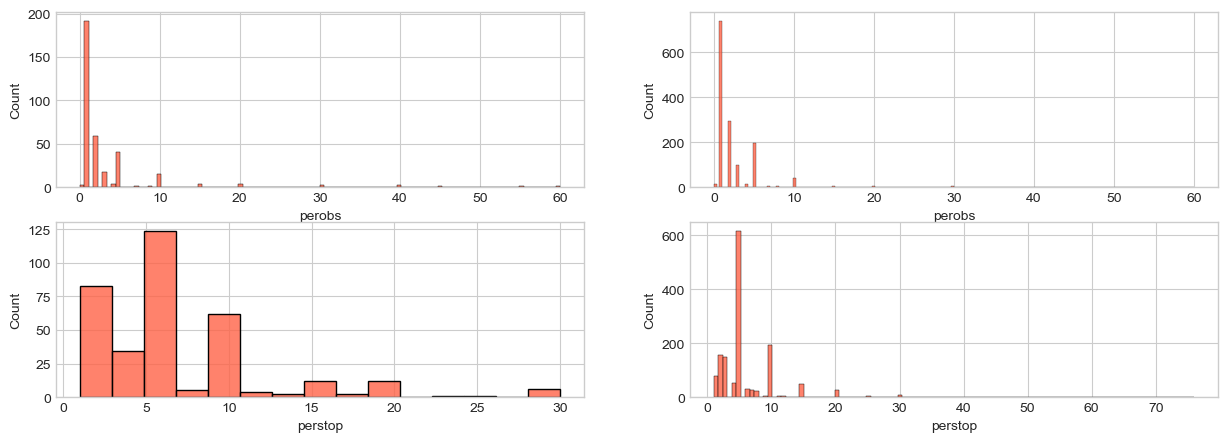

In [81]:
plt.figure(figsize=(15,5))
tmp_df_arst = df_train.loc[df_train['arstmade']=='Y']
tmp_df_viol = df_train.loc[df_train['violmade']=='True']
n = 1
k = 2
for col in ['perobs', 'perstop']:
    plt.subplot(2,2,n)
    sns.histplot(data=tmp_df_arst, x=col, alpha=0.8,color='tomato')
    plt.subplot(2,2,k)
    sns.histplot(data=tmp_df_viol, x=col, alpha=0.8,color='tomato')
    n+=2
    k+=2

In [82]:
tmp_df_arst[['perobs','perstop']].describe(percentiles=[.5,.75,.85,.95])

,perobs,perstop
count,348.000000,348.000000
mean,3.408046,6.534483
std,6.660144,5.622768
min,0.000000,1.000000
50%,1.000000,5.000000
75%,3.000000,10.000000
85%,5.000000,10.000000
95%,10.000000,20.000000
max,60.000000,30.000000


In [83]:
tmp_df_viol[['perobs','perstop']].describe(percentiles=[.5,.75,.85,.95])

,perobs,perstop
count,1448.000000,1448.000000
mean,2.714088,6.161602
std,4.316730,5.220116
min,0.000000,1.000000
50%,1.000000,5.000000
75%,3.000000,7.000000
85%,5.000000,10.000000
95%,8.000000,15.000000
max,60.000000,76.000000


* Se observa cierta tendencia a los valores mas bajos en ambos casos, arrestos realizados y hechos de violencia.
* Se converirá en variable binaria, como criterio el 75% de la concentracion:
    - perobs <= 3
    - perstop <= 3

In [84]:
df_train['perobs_bin'] = np.where((df_train['perobs'] <= 3), 'Y', 'N')
df_train['perstop_bin'] = np.where((df_train['perstop'] <= 3), 'Y', 'N')
df_train['perobs_bin'].value_counts()

Y    4640
N    1156
Name: perobs_bin, dtype: int64

In [85]:
df_train['perstop_bin'].value_counts()

N    3990
Y    1806
Name: perstop_bin, dtype: int64

##### 2.1.1d - Correlaciones:

Finalmente checkeamos las correlaciones existentes para confirmar que no existen altas correlaciones entre atributos continuos 

<Axes: >

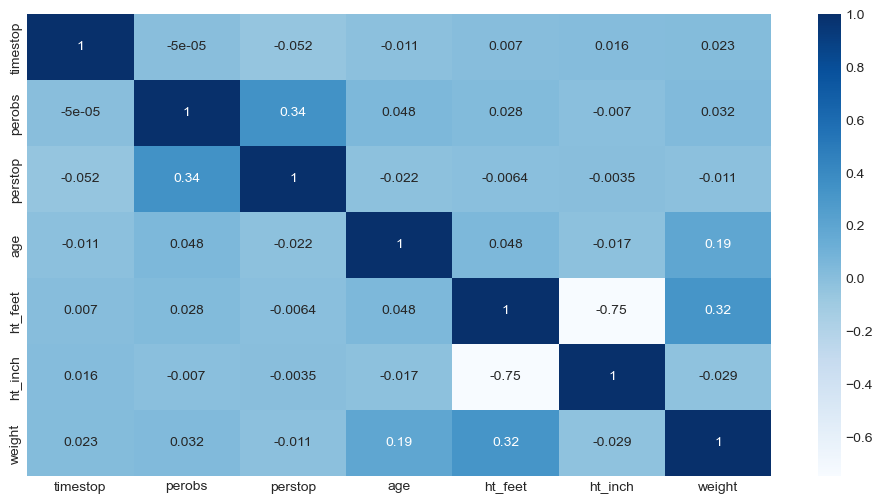

In [86]:
plt.figure(figsize=(12,6))
df_corr = df_train.loc[:,lista_numeros].corr().copy()
sns.heatmap(df_corr,cmap='Blues', annot=True)

* perobs (periodo de observacion) con perstop (periodo de detencion) muestran correlacion positiva entre si.
* Las demas correlaciones relevantes corresponden caracteristicas del individuo entre si.
* No se aprecian correlaciones entre las caracteristicas del individuo y la hora de detencion que podria llegar a ser una de las posibles correlaciones importantes.
* Es por esto que se eliminaran las variables numericas del análisis, y dejar solo variables categóricas binarias, ya recodificadas.

##### 2.1.1e - Dropear atributos continuos / numericos

In [87]:
lista_numeros

['timestop', 'perobs', 'perstop', 'age', 'ht_feet', 'ht_inch', 'weight']

In [88]:
df_train = df_train.drop(columns=lista_numeros)
df_train = df_train.drop(columns=['xcoord','ycoord'])

##### 2.1.1f - Vistazo final y conclusiones del analisis exploratorio:

Primero actualizar la lista de atributos, donde todos deben ser objetos con categorias.

In [89]:
lista_objects, lista_numeros = separar_columnas(df_train, min_filas=2,max_col=5)

Columnas en Obj: 80, en numero: 0, otro: 0

Grillas posibles obj:
Filas = 2, Columnas = 40.0
Filas = 3, Columnas = 27.0
Filas = 4, Columnas = 20.0
Filas = 5, Columnas = 16.0
Filas = 6, Columnas = 14.0

Grillas posibles numericas:


In [90]:
#Guardar para modelar
lista_categorias = lista_objects.copy()

Finalmente para el grafico se sacan los atributos con demasiadas categorias por un tema visual  y ya se estudiaron en detalle ateriormente

In [91]:
no_graficar =['arstoffn', 'sumoffen','crimsusp']
for i in no_graficar:
    lista_objects.remove(i)
print(len(lista_objects))
print(len(lista_categorias))

77
80


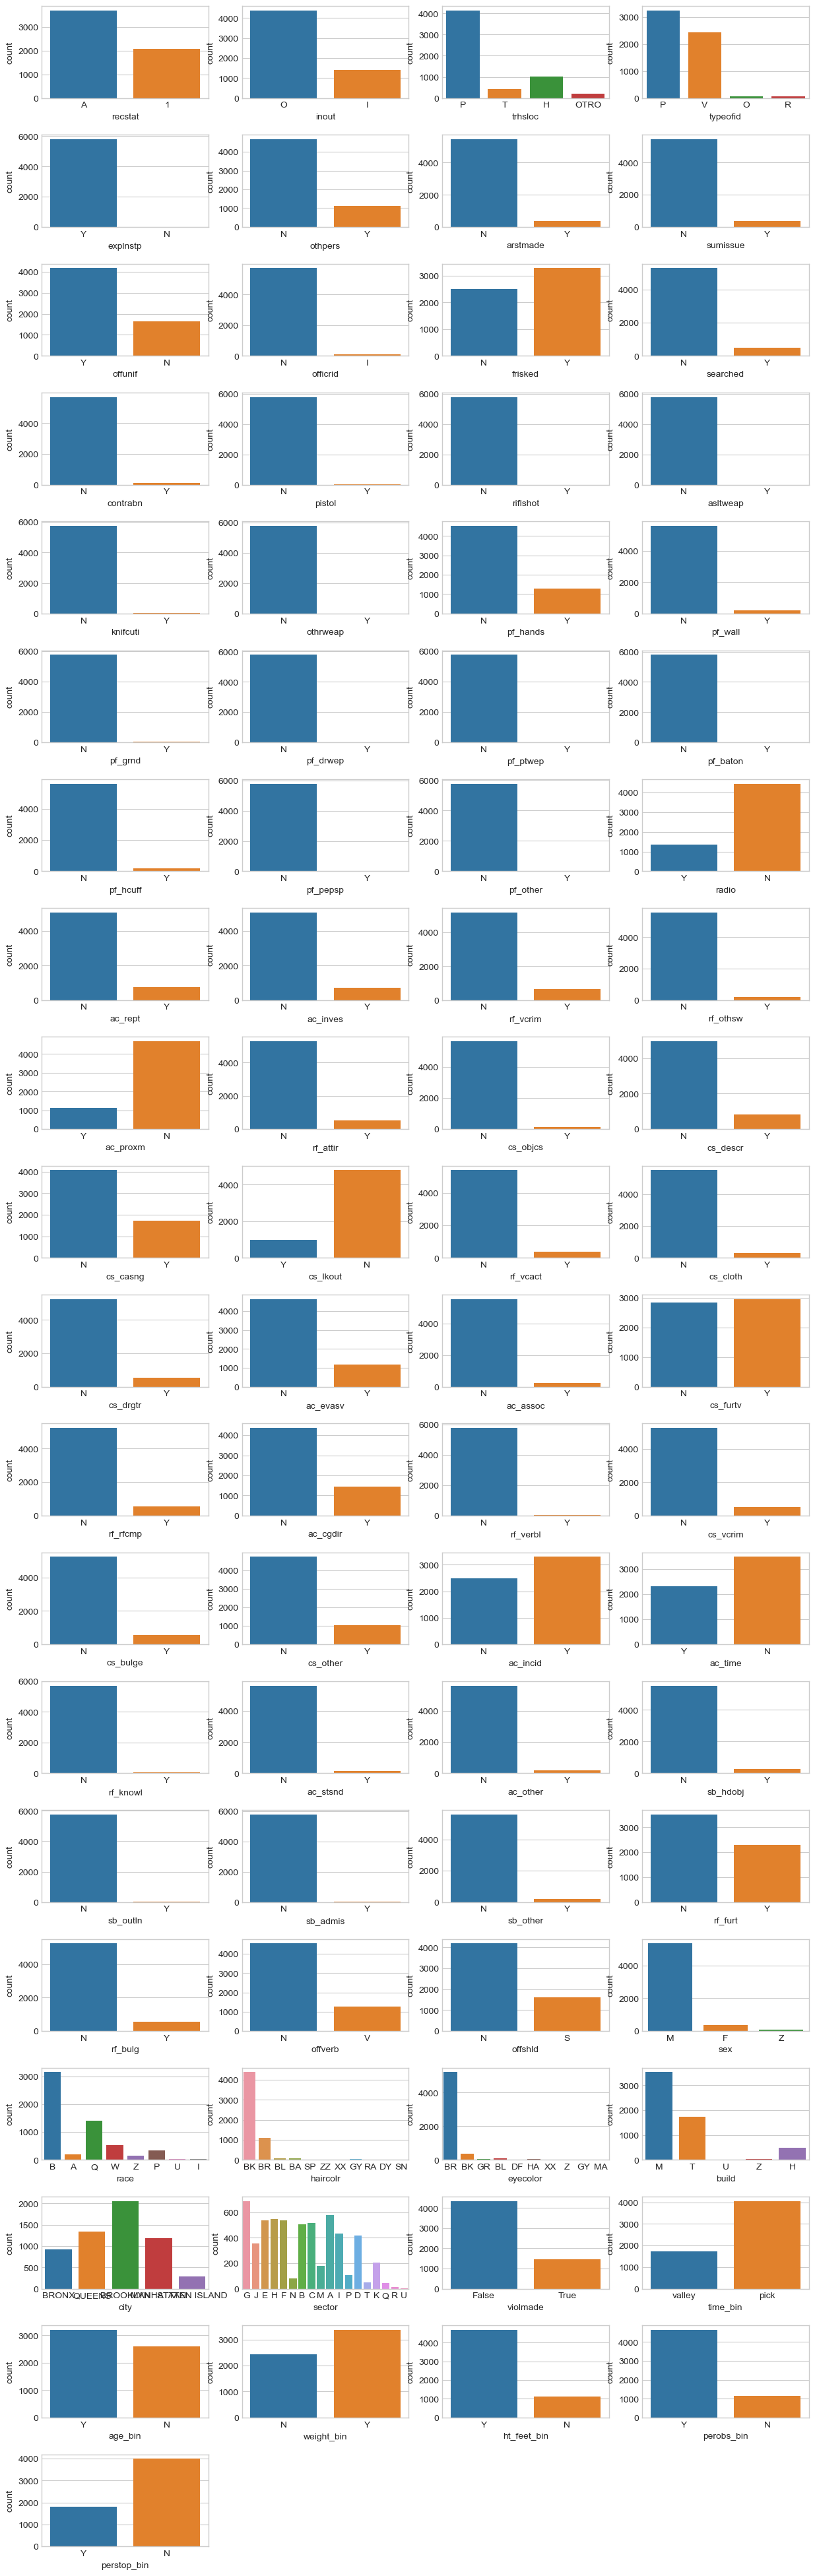

In [92]:
figura=(15,50)
fig = plt.figure(figsize=figura)  # tamaño de la figura
fig.subplots_adjust(hspace=.4)  # ajuste de las subplots
for n,col in enumerate(lista_objects):
    plt.subplot(20,4,n+1)
    sns.countplot(data=df_train,x=col)

* Mencionar que no se quitaron los vectores objetivos con el fin de verlos en la grilla.
* La mayoría de las clases se cargan mas en la clase negativa.
* Race, haircolor y eyecolor muestrans un claro sesgo hacia raza B, BK y BR, todos aluden a origenes afroamericanos, como se menciono en la premisa del informe, era muy probable que los datos cayeran en este sesgo.
* Por otro lado también se aprecia alta concentracion en genero masculino.
* Brooklyn, Queens y manhattan ocupan los 3 primeros lugares, no pareciera haber mayor sesgo a simple vista entre estos 3 barrios al menos.
* Las recodificaciones muestran un buen comportamiento en sus clases, no del todo balanceadas, pero capturan el comportamiento en cuanto a proporciones de los vectores objetivo.

### 2.2 Ejercicio A: Probabilidad de arresto:

 Reportar la probabilidad de que un individuo sea arrestado en uno de los cinco barrios, condicional al género y a la raza. ¿Que implicancias éticas tienen las conclusiones? 

<Axes: xlabel='city', ylabel='Count'>

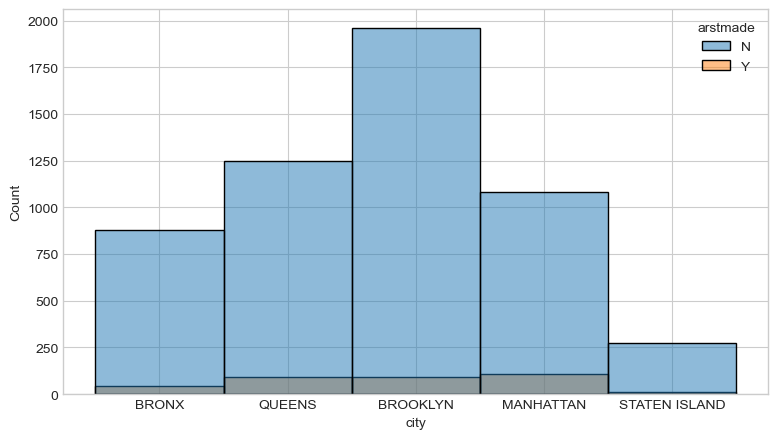

In [93]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
sns.histplot(data=df_train, x='city', hue='arstmade')

In [94]:
# Filtrar arrestos
df_arrestos = df_train.loc[df_train['arstmade'] == 'Y']
# Agrupar 'city', 'sex', 'race'
df_prob = df_arrestos.groupby(['city', 'sex', 'race']).size().reset_index(name='count')

#total casos = todos los arrestos
#casos favorables = conteo de la inteseccion de casos
#Ej: queen hombre americano = conteo / total arrestos
total_arrestos = df_arrestos.shape[0]
df_prob['probabilidad'] = df_prob['count'] / total_arrestos


In [95]:
df_prob['clasificacion'] = df_prob['city']+'-'+df_prob['sex']+'-'+df_prob['race']
df_prob.sample(3)

,city,sex,race,count,probabilidad,clasificacion
2,BRONX,M,P,6,0.017241,BRONX-M-P
34,QUEENS,M,Z,2,0.005747,QUEENS-M-Z
13,MANHATTAN,F,A,1,0.002874,MANHATTAN-F-A


<Axes: ylabel='clasificacion'>

<Figure size 500x1800 with 0 Axes>

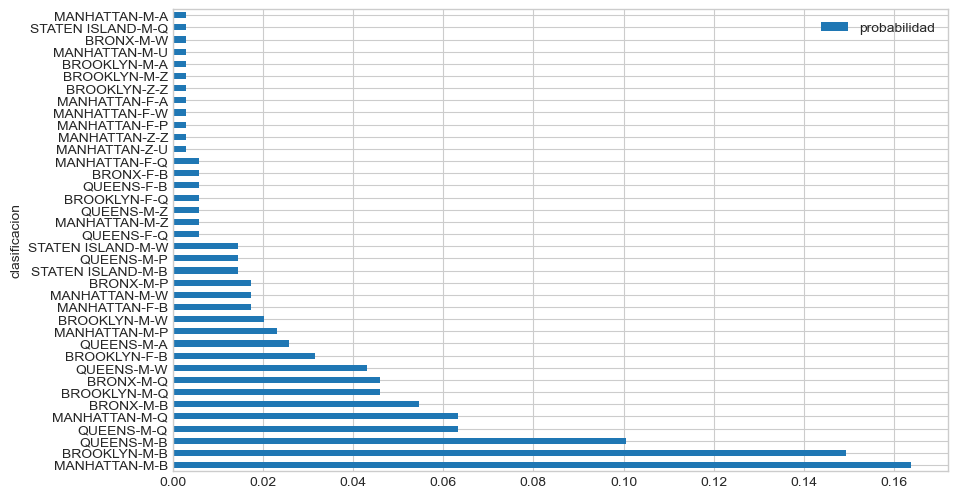

In [96]:
plt.figure(figsize=(5,18))
df_prob.sort_values(by='probabilidad', ascending=False).plot(kind='barh',x='clasificacion', y='probabilidad')

* Las probabilidades mas altas se concentran en Hombres B:Black para los 3 barrios con mas indices de arrestos.
* En los ultimos 3 puestos se encuentran Hombres A: Asian/pacific islander, Q:White-hispanic y W:white  para los barrios manhattan staten island y bronx.


* Claramente la base de datos esta sesgada hacia individuos Hombres B ya que en conjunto los 3 mayores % suman al rededor del 40% de la probabilidad de arresto.

### 2.3 Preparar Matrices para modelar.

#### 2.3.0 Matriz Test

* Se aplican transformaciones

In [97]:
df_test = pipe_df_test(df_test)
df_test.shape

(6013, 118)

* Se realizan los drops correspondientes

In [98]:
lista_diferencias = df1_vs_df2(df_test, df_train)

In [99]:
df_test = df_test.drop(columns=lista_diferencias)

##### 2.3.1.a Matriz Train B

In [100]:
df_train = df_train.loc[:,lista_categorias]
df_train = df_train.drop(columns=['arstoffn','sumoffen','crimsusp'])
df_train.shape


(5796, 77)

In [101]:
tmp_x_train_b = df_train.drop(columns=['arstmade', 'violmade'])
y_train_b = pd.get_dummies(df_train['arstmade'], drop_first=True)
print(tmp_x_train_b.shape)
print(y_train_b.shape)

(5796, 75)
(5796, 1)


In [102]:
x_train_b = pd.get_dummies(tmp_x_train_b, drop_first=True)
y_train_b = pd.get_dummies(df_train['arstmade'], drop_first=True)
print(x_train_b.shape)
print(y_train_b.shape)

(5796, 125)
(5796, 1)


##### 2.3.1.b Matriz Test B

In [103]:
#remover VO
tmp_x_test_b = df_test.drop(columns=['arstmade', 'violmade'])
y_test_b = pd.get_dummies(df_test['arstmade'], drop_first=True)
print(tmp_x_test_b.shape)
print(y_test_b.shape)

(6013, 78)
(6013, 1)


In [104]:
x_test_b = pd.get_dummies(tmp_x_test_b, drop_first=True)
print(x_test_b.shape)
print(y_test_b.shape)

(6013, 848)
(6013, 1)


##### 2.3.2 Ejercicio C: Violmade

##### 2.3.2.a Matriz Train C

In [105]:
#Generar lista con columnas para drop
lista_violencia  = df_train.filter(regex='^pf_').columns.to_list()

In [106]:
#Eliminar columnas redundantes sobre violencia
tmp_x_train_c = df_train.drop(columns=lista_violencia)
tmp_x_train_c.shape

(5796, 68)

In [107]:
#Eliminar vectores objetivos
tmp_x_train_c = tmp_x_train_c.drop(columns=['arstmade', 'violmade'])
y_train_c = pd.get_dummies(df_train['violmade'], drop_first=True)
print(tmp_x_train_c.shape)
print(y_train_c.shape)

(5796, 66)
(5796, 1)


In [108]:
x_train_c = pd.get_dummies(tmp_x_train_c, drop_first=True)
print(x_train_c.shape)
print(y_train_c.shape)

(5796, 116)
(5796, 1)


##### 2.3.2.b Matriz Test C

In [109]:
#Generar lista con columnas para drop
lista_violencia  = df_test.filter(regex='^pf_').columns.to_list()

In [110]:
#Eliminar columnas redundantes sobre violencia
tmp_x_test_c = df_test.drop(columns=lista_violencia)
tmp_x_test_c.shape

(6013, 71)

In [111]:
#remover VO
tmp_x_test_c = tmp_x_test_c.drop(columns=['arstmade', 'violmade'])
y_test_c = pd.get_dummies(df_test['arstmade'], drop_first=True)
print(tmp_x_test_c.shape)
print(y_test_c.shape)

(6013, 69)
(6013, 1)


In [112]:
x_test_c = pd.get_dummies(tmp_x_test_c, drop_first=True)
print(x_test_c.shape)
print(y_test_c.shape)

(6013, 839)
(6013, 1)


##### 2.3.2.c - Igualar matrices

In [113]:
#quitar sobrantes de train
lista_distintasb1 = df1_vs_df2(x_train_b,x_test_b)
x_train_b = x_train_b.drop(columns=lista_distintasb1)
#quitar sobrantes de test
lista_distintasb2 = df1_vs_df2(x_test_b,x_train_b)
x_test_b = x_test_b.drop(columns=lista_distintasb2)

print(x_train_b.shape)
print(x_test_b.shape)

(5796, 121)
(6013, 121)


In [114]:
#quitar sobrantes de train
lista_distintasc1 = df1_vs_df2(x_train_c,x_test_c)
x_train_c = x_train_c.drop(columns=lista_distintasc1)
#quitar sobrantes de test
lista_distintasc2 = df1_vs_df2(x_test_c,x_train_c)
x_test_c = x_test_c.drop(columns=lista_distintasc2)

print(x_train_c.shape)
print(x_test_c.shape)

(5796, 112)
(6013, 112)


## Hitos 3 y 4

### 3.0 - Modelacion

#### 3.0 Modelacion

* Tener en cuenta matrices:
* Modelos B:
    - x_train_b
    - x_test_b
    - y_train_b
    - y_test_b
* Modelos B:
    - x_train_c
    - x_test_c
    - y_train_c
    - y_test_c


* Se crean matrices balanceadas mediante el metodo de oversampling se imbalanced learn, con el fin de eliminar el sesgo visto hacia razas afroamericanas.

In [115]:
# Instanciamos la clase
oversampler = SVMSMOTE(random_state=1991, sampling_strategy='not majority')
# generamos el eversampling de la matriz de entrenamiento y
x_train_ov_b, y_train_ov_b = oversampler.fit_resample(x_train_b,
y_train_b)

In [116]:
# Instanciamos la clase
oversampler = SVMSMOTE(random_state=1991, sampling_strategy='not majority')
# generamos el eversampling de la matriz de entrenamiento y
x_train_ov_c, y_train_ov_c = oversampler.fit_resample(x_train_c,
y_train_c)

* Este paso re muestrea todos los valores menos la clase mayoritaria.
* El remuestreo implicara en una caida del rendimiento de los modelos, sin embargo ayudará a la capacidad de generalización del modelo.
* En trasfondo se probo con los distintos SMOTE disponibles en imbalanced learn y SVMSMOTE fue el que dio mejor resultado.
* Un ejemplo de la caida del modelo es LDA que pasa de .98 y .72 en F1 para cada clase a .97 y .00 en F1 para cada clase (0 y 1), esto sin modificar hiper parametros.


In [117]:
#sin oversampling
print(f'''{x_train_b.shape}
{x_test_b.shape}
{y_train_b.shape}
{y_test_b.shape}
''')

(5796, 121)
(6013, 121)
(5796, 1)
(6013, 1)



In [118]:
#con oversampling
print(f'''{x_train_ov_b.shape}
{x_test_b.shape}
{y_train_ov_b.shape}
{y_test_b.shape}
''')

(10896, 121)
(6013, 121)
(10896, 1)
(6013, 1)



### 3.1 Modelacion Ejercicio B Arstmade

##### 3.1.1.a - Modelo 1: Naive Bayes

In [119]:
nb1_tr , nb1_ts = modelacion_inicial(BernoulliNB(), x_train_ov_b, x_test_b,
                                     y_train_ov_b,y_test_b, guardar=True)

Metricas en entrenamiento
                  precision    recall  f1-score   support

           0       0.88      0.98      0.93      5448
           1       0.98      0.86      0.92      5448

    accuracy                           0.92     10896
   macro avg       0.93      0.92      0.92     10896
weighted avg       0.93      0.92      0.92     10896

Metricas en Testeo
                  precision    recall  f1-score   support

           0       0.97      0.97      0.97      5613
           1       0.61      0.61      0.61       400

    accuracy                           0.95      6013
   macro avg       0.79      0.79      0.79      6013
weighted avg       0.95      0.95      0.95      6013

    


* F1 Score en train bastante alto .93 y .92 indica un buen fit en el entrenamiento, no llega a ser overfit
* F1 Score en test para 0 sube a .97 para 1 el caso de interes cae a .61, .36 puntos de diferencia.
* Accuracy del modelo en train .92 indica un buen fit en el entrenamiento, y Accuracy del modelo en test .95, soprende que sea mejor que en el train, nos indica un que es un buen modelo.

##### 3.1.1.b Modelo 2 Random Forest

* Parametros:
    - n_estimators: default=100
    - criterion: “gini”, “entropy”, “log_loss”, default=”gini”
    - max_depth: profundidad default: none = nodos expandidos hasta que las hojas contengan min_samples_split samples o puras
    - min_samples_split: default=2 : minimo numero de samples para separar un nodo, un valor mayor puede reducir el riesgo de sobreajuste
    - min_samples_leaf: default=1 : este parámetro controla el número mínimo de muestras que se requieren en cada hoja del árbol. Un valor mayor puede hacer que el modelo sea más generalizado
    - max_features{“sqrt”, “log2”, None}, int or float, default=”sqrt”
    - warm_start: default=False: True = Reutiliza la solucion previa para entrenar y agregar mas estimadores.
    - random_state

In [120]:
rf1_tr , rf1_ts = modelacion_inicial(RandomForestClassifier(), x_train_ov_b, x_test_b,
                                     y_train_ov_b,y_test_b, guardar=True)

Metricas en entrenamiento
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      5448
           1       1.00      1.00      1.00      5448

    accuracy                           1.00     10896
   macro avg       1.00      1.00      1.00     10896
weighted avg       1.00      1.00      1.00     10896

Metricas en Testeo
                  precision    recall  f1-score   support

           0       0.97      0.99      0.98      5613
           1       0.82      0.61      0.70       400

    accuracy                           0.97      6013
   macro avg       0.90      0.80      0.84      6013
weighted avg       0.96      0.97      0.96      6013

    


* F1 Score en train MUY alto 1.0 para 0 y 1.0 para 1 en comparacion al test .3 de difecencia es overfit en la clase.
* Accuracy del modelo en train 1.0 vs. Accuracy del modelo en test .97,  nos indica un que es un buen modelo para el test, sin embargo puede caer en sobre ajuste.

Random forest es superior al decision tree

##### 3.1.1.c Modelo 3 GradientBoost

* Parametros:
    - loss: ‘log_loss’, ‘deviance’, ‘exponential’, default=’log_loss’= Funcion de perdida a ser optimizada en exponencial  gradient boost toma el algoritmo de adaboost
    - n_estimator: default 100 = un numero alto siele resultar en una mejor performance.
    - subsample: default=1 = fraccion de muestras para ser entrenadas como base del aprendizaje. seleccionar un valor menor a 1 implica reduccion de la varianza debe estar entre 0 y 1
    - min_samples_split: default 2 = min de muestras requeridas para dividir un nodo. Un valor más alto evita divisiones que conducen a regiones con pocas muestras, lo que puede reducir el sobreajuste, pero también puede hacer que el modelo pierda información importante.
    - min_samples_leaf: default 1 = min de muestras requeridas para estar en un nodo de hoja.
    - max_depthi: int - None, default:3 =  La profundidad máxima de cada árbol. Un valor más alto permite que el modelo capture relaciones más complejas, pero también aumenta la posibilidad de sobreajuste.
    - max_features{‘auto’, ‘sqrt’, ‘log2’}, int or float, default=None
    - warm_star: tbool, default: False = Guarda el resultado anterior en la memoria para iterar.
    - randomstate

In [121]:
gb1_tr , gb1_ts = modelacion_inicial(GradientBoostingClassifier(), x_train_ov_b, x_test_b,
                                     y_train_ov_b,y_test_b, guardar=True)

Metricas en entrenamiento
                  precision    recall  f1-score   support

           0       0.98      0.99      0.98      5448
           1       0.99      0.98      0.98      5448

    accuracy                           0.98     10896
   macro avg       0.98      0.98      0.98     10896
weighted avg       0.98      0.98      0.98     10896

Metricas en Testeo
                  precision    recall  f1-score   support

           0       0.97      0.99      0.98      5613
           1       0.82      0.64      0.72       400

    accuracy                           0.97      6013
   macro avg       0.90      0.81      0.85      6013
weighted avg       0.96      0.97      0.96      6013

    


* F1 Score en train muy alto .98  en ambas clases.
* F1 Score en test para 0 .98 para 1 el caso de interes cae a .72, es un numero bueno con un .26  de diferencia entre train y test se acorta la brecha que induce al posible overfiting
* Accuracy del modelo en train .98 vs .97 es un buenindicador del modelo.
* Se debe penalizar el modelo para mejorar un poco su generalizacion de la clase 1, sin embargo es un muy buen modelo.

##### 3.3.2.a Gradient boost mejora

* Muestra ser el mejor en balancear overfit vs rendimiento en el train, sin menospreciar la capacidad de naive bayes de generalizar los datos y obtener un buen resultado.

In [122]:
param_gboost = {'learning_rate':[0.00001,0.0001,0.001],
                'max_depth':[1,10,100],
                'min_samples_split':[10,50],
                'min_samples_leaf':[10,50],
                'subsample':[0.1,0.02,0.05]   
    }
model_gboost = GridSearchCV( GradientBoostingClassifier(random_state=1991),
                               param_grid=param_gboost,
                                cv=5,
                                n_jobs=-1,
                                verbose=5
                            )
model_gboost.fit(x_train_ov_b, y_train_ov_b)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1991),
             n_jobs=-1,
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001],
                         'max_depth': [1, 10, 100],
                         'min_samples_leaf': [10, 50],
                         'min_samples_split': [10, 50],
                         'subsample': [0.1, 0.02, 0.05]},
             verbose=5)

In [123]:
print(model_gboost.best_params_)
yhat_gboost2_tr = model_gboost.best_estimator_.predict(x_train_ov_b)
yhat_gboost2_ts = model_gboost.best_estimator_.predict(x_test_b)
gboost2_tr = classification_report(y_train_ov_b, yhat_gboost2_tr)
gboost2_ts = classification_report(y_test_b, yhat_gboost2_ts)

{'learning_rate': 1e-05, 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 10, 'subsample': 0.1}


In [124]:
print(gboost2_tr)
print(gboost2_ts)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      5448
           1       0.98      0.93      0.95      5448

    accuracy                           0.96     10896
   macro avg       0.96      0.96      0.96     10896
weighted avg       0.96      0.96      0.96     10896

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      5613
           1       0.64      0.66      0.65       400

    accuracy                           0.95      6013
   macro avg       0.81      0.82      0.81      6013
weighted avg       0.95      0.95      0.95      6013



In [125]:
print(f'Brecha modelo sin grilla: {98-72}')
print(f'Brecha modelo con grilla: {95-65}')

Brecha modelo sin grilla: 26
Brecha modelo con grilla: 30


* No se logra disminuir la brecha para categorizar los 1, sin embargo el accuracy general del modelo es bastante bueno, por lo que se optara por el modelo sin penalizar

##### 3.3.2.b  Mejores atributos 

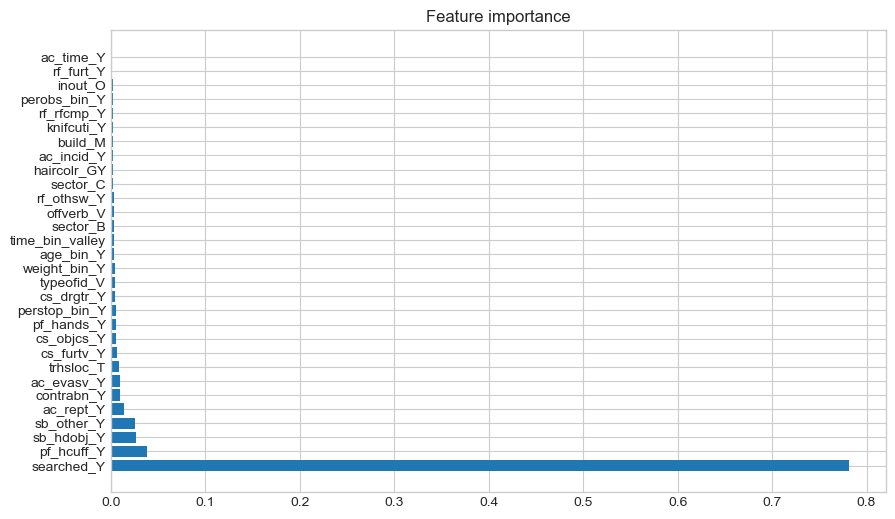

In [126]:
name_best_col = graficar_importancia(model_gboost.best_estimator_, x_train_ov_b.columns, nro_a_imprimir=30)

* El atributo mas importante se encuentra en la columna searched categoria 'SI'
* Luego pf_hcuff (fuerza fisica, esposas) y sb_hdobj (busqueda basica - objeto contundente) 
* **Proceso de refinamiento de atributos**: Dentro del proceso de mejoramiento de atributos Aparencen algunas de las variables continuas convertidas a binarias para mejorar su comportamiento e incluirlas en la matriz sin problemas:
    - weight 
    - perobs
    - perstop 
    - age
* Tabien aparece la  variable minoritaria haircolor GY, esto es efecto del balanceo realizado en los datos.

### 4 Modelacion Ejercicio C Violmade

#### 4.1 Modelacion

##### 4.1.1 Naive bayes

In [127]:
nb2_tr , nb2_ts = modelacion_inicial(BernoulliNB(), x_train_ov_c, x_test_c,
                                     y_train_ov_c,y_test_c, guardar=True)

Metricas en entrenamiento
                  precision    recall  f1-score   support

           0       0.80      0.70      0.74      4348
           1       0.73      0.82      0.77      4348

    accuracy                           0.76      8696
   macro avg       0.76      0.76      0.76      8696
weighted avg       0.76      0.76      0.76      8696

Metricas en Testeo
                  precision    recall  f1-score   support

           0       0.97      0.61      0.74      5613
           1       0.11      0.71      0.20       400

    accuracy                           0.61      6013
   macro avg       0.54      0.66      0.47      6013
weighted avg       0.91      0.61      0.71      6013

    


* F1 decae drasticamente en el testeo, bajando .57 puntos.
* En aspectos generales accuracy se comporta bien, con una brecha no tan distante

##### 4.1.2 Random Forest

In [128]:
rf2_tr , rf2_ts = modelacion_inicial(RandomForestClassifier(),x_train_ov_c, x_test_c,
                                     y_train_ov_c,y_test_c, guardar=True)

Metricas en entrenamiento
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      4348
           1       1.00      1.00      1.00      4348

    accuracy                           1.00      8696
   macro avg       1.00      1.00      1.00      8696
weighted avg       1.00      1.00      1.00      8696

Metricas en Testeo
                  precision    recall  f1-score   support

           0       0.95      0.89      0.92      5613
           1       0.17      0.31      0.22       400

    accuracy                           0.85      6013
   macro avg       0.56      0.60      0.57      6013
weighted avg       0.90      0.85      0.87      6013

    


* Al igual que el modelo anterior, muestra un overfit en la clase 1.


##### 4.1.3 Gradient boost

In [129]:
gb2_tr , gb2_ts = modelacion_inicial(GradientBoostingClassifier(), x_train_ov_c, x_test_c,
                                     y_train_ov_c,y_test_c, guardar=True)

Metricas en entrenamiento
                  precision    recall  f1-score   support

           0       0.83      0.85      0.84      4348
           1       0.85      0.83      0.84      4348

    accuracy                           0.84      8696
   macro avg       0.84      0.84      0.84      8696
weighted avg       0.84      0.84      0.84      8696

Metricas en Testeo
                  precision    recall  f1-score   support

           0       0.96      0.78      0.86      5613
           1       0.14      0.53      0.23       400

    accuracy                           0.76      6013
   macro avg       0.55      0.65      0.54      6013
weighted avg       0.90      0.76      0.82      6013

    


* Logra mejorar el overfitting, sin embargo aun se mantiene una alta brecha en la categoria 1.
* En accuracy tiene un buen comportamiento.

##### 4.1.4 Adda Boost

In [130]:
ada2_tr , ada2_ts = modelacion_inicial(AdaBoostClassifier(), x_train_ov_c, x_test_c,
                                     y_train_ov_c,y_test_c, guardar=True)

Metricas en entrenamiento
                  precision    recall  f1-score   support

           0       0.77      0.93      0.85      4348
           1       0.92      0.73      0.81      4348

    accuracy                           0.83      8696
   macro avg       0.85      0.83      0.83      8696
weighted avg       0.85      0.83      0.83      8696

Metricas en Testeo
                  precision    recall  f1-score   support

           0       0.96      0.92      0.94      5613
           1       0.29      0.49      0.37       400

    accuracy                           0.89      6013
   macro avg       0.63      0.70      0.65      6013
weighted avg       0.92      0.89      0.90      6013

    


* F1: Mejora bastante en encontrar la categoria 1, la brecha disminuye a .44
* Accuracy en test mejora en comparacion al train

##### 4.1.4 Voting

Se espera combinar los mejores resultado por medio de un modelo de votacion

In [131]:
estimators = [
    ('ada', AdaBoostClassifier()) ,
    ('bernoulli', BernoulliNB())              
]

In [132]:
voting2 = VotingClassifier(estimators)
voting2.fit(x_train_ov_c, y_train_ov_c)
yhat_tr= voting2.predict(x_train_c)
yhat_ts_voting2= voting2.predict(x_test_c)
print(classification_report(y_train_c, yhat_tr))
print(classification_report(y_test_c, yhat_ts_voting2))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      4348
           1       0.58      0.23      0.33      1448

    accuracy                           0.77      5796
   macro avg       0.68      0.59      0.59      5796
weighted avg       0.73      0.77      0.73      5796

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5613
           1       0.30      0.47      0.37       400

    accuracy                           0.89      6013
   macro avg       0.63      0.70      0.66      6013
weighted avg       0.92      0.89      0.90      6013



In [133]:
w1 = [.3, .7]
w2 = [.7, .3]

In [134]:
voting_w1 = VotingClassifier(estimators, weights=w1)
voting_w1.fit(x_train_ov_c, y_train_ov_c)
yhat_tr= voting_w1.predict(x_train_c)
yhat_ts_voting_w1= voting_w1.predict(x_test_c)
print(classification_report(y_train_c, yhat_tr))
print(classification_report(y_test_c, yhat_ts_voting_w1))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      4348
           1       0.44      0.73      0.55      1448

    accuracy                           0.70      5796
   macro avg       0.67      0.71      0.67      5796
weighted avg       0.78      0.70      0.72      5796

              precision    recall  f1-score   support

           0       0.97      0.61      0.74      5613
           1       0.11      0.71      0.20       400

    accuracy                           0.61      6013
   macro avg       0.54      0.66      0.47      6013
weighted avg       0.91      0.61      0.71      6013



In [135]:
voting_w2 = VotingClassifier(estimators, weights=w2)
voting_w2.fit(x_train_ov_c, y_train_ov_c)
yhat_tr= voting_w2.predict(x_train_c)
yhat_ts_voting_w2= voting_w2.predict(x_test_c)
print(classification_report(y_train_c, yhat_tr))
print(classification_report(y_test_c, yhat_ts_voting_w2))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      4348
           1       0.55      0.24      0.34      1448

    accuracy                           0.76      5796
   macro avg       0.67      0.59      0.60      5796
weighted avg       0.73      0.76      0.73      5796

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5613
           1       0.29      0.49      0.37       400

    accuracy                           0.89      6013
   macro avg       0.63      0.70      0.65      6013
weighted avg       0.92      0.89      0.90      6013



* Mediante una ponderacion enfocada en AdaBoost se logra mejorar el modelo de votacion
* En terminos generales un .95 accuracy en test
* En terminos locales para encontrar la categoria de violencia '1' disminuye la brecha a solo 13 puntos.
* Aun es baja la capacidad predictiva en 1 ya que no logra llegar a .5

#### 4.2 Mejora de Modelacion

##### 4.2.1 Ada

In [136]:
param_ada = {'learning_rate':[0.001,0.05,0.1,0.5,1],
             'n_estimators':[125,150,175,190,200]  
    }
model_ada = GridSearchCV( AdaBoostClassifier(random_state=1991),
                               param_grid=param_ada,
                                cv=5,
                                n_jobs=-1,
                                verbose=5
                            )
model_ada.fit(x_train_ov_c, y_train_ov_c)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1991), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.05, 0.1, 0.5, 1],
                         'n_estimators': [125, 150, 175, 190, 200]},
             verbose=5)

In [137]:
print(model_ada.best_params_)
yhat_ada_tr = model_ada.best_estimator_.predict(x_train_ov_c)
yhat_ada_ts = model_ada.best_estimator_.predict(x_test_c)
ada_tr = classification_report(y_train_ov_c, yhat_ada_tr)
ada_ts = classification_report(y_test_c, yhat_ada_ts)

{'learning_rate': 0.1, 'n_estimators': 175}


In [138]:
print(ada_tr)
print(ada_ts)

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      4348
           1       0.94      0.72      0.81      4348

    accuracy                           0.84      8696
   macro avg       0.86      0.84      0.83      8696
weighted avg       0.86      0.84      0.83      8696

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5613
           1       0.37      0.46      0.41       400

    accuracy                           0.91      6013
   macro avg       0.66      0.70      0.68      6013
weighted avg       0.92      0.91      0.92      6013



In [139]:
yhat_modelos = {'adda':yhat_ada_ts}

* Mantiene el comportamiento general
* Mejora la estabilidad del modelo.

##### 4.2.2 Bernoulli

In [140]:
param_nb = {'alpha': [0.000001,0.00001,0.0001,0.001,0.1, 1.0],
            'class_prior': [None, [0.01, 0.99], [0.05, 0.95], [0.1, 0.9],[0.2, 0.8],[0.15, 0.85]]
    }
model_nb = GridSearchCV( BernoulliNB(),
                               param_grid=param_nb,
                                cv=5,
                                n_jobs=-1,
                                verbose=5
                            )
model_nb.fit(x_train_ov_c, y_train_ov_c)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.1, 1.0],
                         'class_prior': [None, [0.01, 0.99], [0.05, 0.95],
                                         [0.1, 0.9], [0.2, 0.8],
                                         [0.15, 0.85]]},
             verbose=5)

In [141]:
print(model_nb.best_params_)
yhat_nb_tr = model_nb.best_estimator_.predict(x_train_ov_c)
yhat_nb_ts = model_nb.best_estimator_.predict(x_test_c)
nb_tr = classification_report(y_train_ov_c, yhat_nb_tr)
nb_ts = classification_report(y_test_c, yhat_nb_ts)

{'alpha': 1e-06, 'class_prior': [0.2, 0.8]}


In [142]:
print(nb_tr)
print(nb_ts)

              precision    recall  f1-score   support

           0       0.88      0.61      0.72      4348
           1       0.70      0.92      0.80      4348

    accuracy                           0.76      8696
   macro avg       0.79      0.76      0.76      8696
weighted avg       0.79      0.76      0.76      8696

              precision    recall  f1-score   support

           0       0.97      0.51      0.67      5613
           1       0.10      0.80      0.18       400

    accuracy                           0.53      6013
   macro avg       0.54      0.65      0.43      6013
weighted avg       0.91      0.53      0.64      6013



* El mejor bernoulli se logra sin parametrizar.

In [143]:
best_nb_c = BernoulliNB().fit(x_train_ov_c, y_train_ov_c)
yhat_ts_nb_c= best_nb_c.predict(x_test_c)

In [144]:
yhat_modelos['nb'] = yhat_ts_nb_c

##### 4.2.3 Voting 2

In [145]:
estimators2 = [
    ('ada', AdaBoostClassifier(learning_rate= 0.1, n_estimators= 175)) ,
    ('bernoulli', BernoulliNB())              
]

In [146]:
voting2 = VotingClassifier(estimators2)
voting2.fit(x_train_ov_c, y_train_ov_c)
yhat_tr= voting2.predict(x_train_c)
yhat_ts_voting2= voting2.predict(x_test_c)
print(classification_report(y_train_c, yhat_tr))
print(classification_report(y_test_c, yhat_ts_voting2))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      4348
           1       0.60      0.18      0.27      1448

    accuracy                           0.76      5796
   macro avg       0.69      0.57      0.57      5796
weighted avg       0.73      0.76      0.71      5796

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5613
           1       0.37      0.45      0.40       400

    accuracy                           0.91      6013
   macro avg       0.66      0.70      0.68      6013
weighted avg       0.92      0.91      0.92      6013



In [147]:
w1 = [.3, .7]
w2 = [.7, .3]

In [148]:
voting_w1 = VotingClassifier(estimators, weights=w1)
voting_w1.fit(x_train_ov_c, y_train_ov_c)
yhat_tr= voting_w1.predict(x_train_c)
yhat_ts_voting_w1= voting_w1.predict(x_test_c)
print(classification_report(y_train_c, yhat_tr))
print(classification_report(y_test_c, yhat_ts_voting_w1))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78      4348
           1       0.44      0.73      0.55      1448

    accuracy                           0.70      5796
   macro avg       0.67      0.71      0.67      5796
weighted avg       0.78      0.70      0.72      5796

              precision    recall  f1-score   support

           0       0.97      0.61      0.74      5613
           1       0.11      0.71      0.20       400

    accuracy                           0.61      6013
   macro avg       0.54      0.66      0.47      6013
weighted avg       0.91      0.61      0.71      6013



In [149]:
voting_w2 = VotingClassifier(estimators, weights=w2)
voting_w2.fit(x_train_ov_c, y_train_ov_c)
yhat_tr= voting_w2.predict(x_train_c)
yhat_ts_voting_w2= voting_w2.predict(x_test_c)
print(classification_report(y_train_c, yhat_tr))
print(classification_report(y_test_c, yhat_ts_voting_w2))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      4348
           1       0.55      0.24      0.34      1448

    accuracy                           0.76      5796
   macro avg       0.67      0.59      0.60      5796
weighted avg       0.73      0.76      0.73      5796

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5613
           1       0.29      0.49      0.37       400

    accuracy                           0.89      6013
   macro avg       0.63      0.70      0.65      6013
weighted avg       0.92      0.89      0.90      6013



* El mejor resultado se obtiene del voting balanceado, el mejor modelo para predecir violencia en el arresto es:
    - voting_w2


In [150]:
yhat_modelos['voting'] = yhat_ts_voting_w2

### 4.3.1 Desempeño

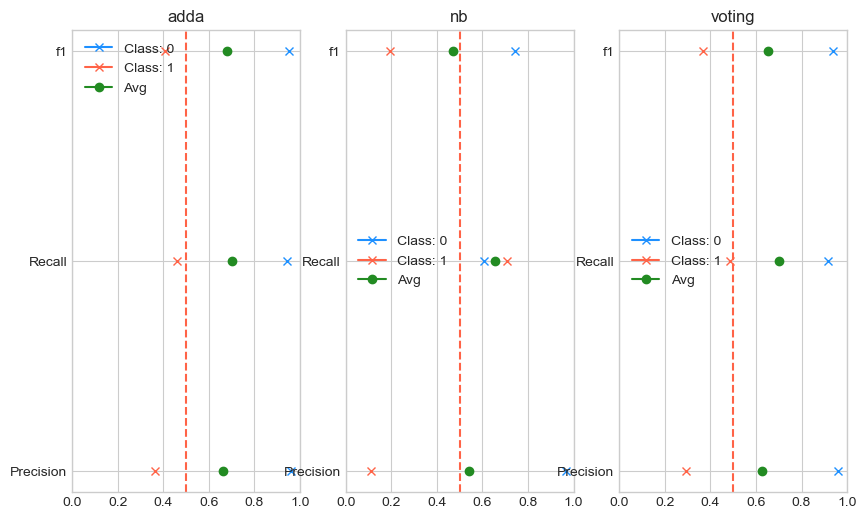

In [151]:
for n, k in enumerate(yhat_modelos):
    value = yhat_modelos[k]
    plt.subplot(1, 3, n + 1)
    plt.title(k)
    plt.axvline(x=.5, color='Tomato', linestyle='--')
    pcr(y_test_c, value)
    plt.legend()

* Voting Logra la mejor estabilidad de los indicadores
* en clasificar los 1 adquiere todo los razgos de adda boost
* En cuanto a accuracy logra .91 lo cual es muy buen rendimineto

### 5 Conclusiones

* Bernoulli es un buen modelo para problemas con categorias binarias.
* Voting ayuda a consolidar foralezas de los modelos.
* La recodificacion de variables es fundamental en este tipo de problemas.
* Tener informacion de un experto, o poseer una base de datos previamente depurada ayudaría mucho mas al modelo.
* Realizar un balanceo de clases ayuda a la generalizacion del modelo y disminuir la posibilad de overfitting.
* Al tener dos bases distintas, se pedío mucha informacion de columnas que no tenian las mismas categorías

### 6 Serialización

#### Serialización de modelos

In [152]:
dump(model_gboost,open('diego_lizana_gboost_arrestos.sav', 'wb'))
dump(voting_w2,open('diego_lizana_votingw2_violencia.sav', 'wb'))

# **FIN**